# Imports

In [73]:
import re
import pandas as pd
import numpy as np
import scipy
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
from scipy.spatial import ConvexHull, Voronoi, voronoi_plot_2d
from matplotlib.patches import Ellipse
import pingouin as pg
from statsmodels.stats.multitest import multipletests
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, WeekdayLocator, MO
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import warnings
import matplotlib.cbook
import matplotlib.dates as mdates
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import seaborn as sns
sns.set_theme(style="white")


from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor, make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.inspection import partial_dependence, PartialDependenceDisplay, permutation_importance
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, adjusted_rand_score,r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeClassifier, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBRFClassifier

In [ ]:
# Add project root to sys.path so you can import path_config regardless of notebook location
sys.path.append(str(Path.cwd().parents[2]))  # adjust depth as needed if notebook is deep in folders

from path_config import project_path, project_data_sources_path, project_data_exports_path

print(f'project_path: {project_path}')
print(f'project_data_sources_path: {project_data_sources_path}')
print(f'project_data_exports_path: {project_data_exports_path}')

In [74]:
# project_path = Path.cwd()
# print(f'project_path: {project_path}')
# print('')
# project_data_sources_path = Path.cwd() / 'data' / 'sources'
# print(f'project_data_sources_path: {project_data_sources_path}')
# print('')
# project_data_exports_path = Path.cwd() / 'data' / 'exports'
# print(f'project_data_exports_path: {project_data_exports_path}')

project_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/college_football/initial_analysis

project_data_sources_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/college_football/initial_analysis/data/sources

project_data_exports_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/college_football/initial_analysis/data/exports


# User Defined Functions

## Dataset Import and Wrangling

In [75]:
def load_game_results_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'game_results_df.csv',
        # sheet_name='Sheet1 (2)',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [76]:
def load_passing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'passing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [77]:
def load_receiving_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'receiving_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [78]:
def load_rushing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'rushing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [79]:
def load_spotrac_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_salary_cap_data_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [80]:
def load_nfl_season_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'nfl_season_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [81]:
def load_spotrac_nfl_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [82]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [83]:
def load_team_season_records_stats_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'team_season_records_stats_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [ ]:
def load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_one_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [ ]:
def load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_two_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [ ]:
def load_spotrac_nfl_team_pos_level_one_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_one_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [901]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [11]:
def load_spotrac_nfl_team_season_roster_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [12]:
def load_spotrac_nfl_team_season_roster_pos_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_pos_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [13]:
def load_spotrac_nfl_team_season_roster_position_level_one_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_one_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [14]:
def load_spotrac_nfl_team_season_roster_position_level_two_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_two_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

## Regression Modeling

In [84]:
def create_feature_lists(dataframe):
    """
    Dynamically detects numeric and categorical features in a pandas DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input data.

    Returns:
    - numeric_features (list): List of numeric feature column names.
    - categorical_features (list): List of categorical feature column names.
    """
    numeric_selector = make_column_selector(dtype_include=np.number)
    categorical_selector = make_column_selector(dtype_include=[object, 'category'])

    numeric_features = numeric_selector(dataframe)
    categorical_features = categorical_selector(dataframe)

    return numeric_features, categorical_features

In [85]:
def create_preprocessor(is_tree_based=False, include_interactions=False, interact_all_features=False,
                        include_polynomials=False, poly_all_features=False,
                        selected_numeric_features=None, selected_categorical_features=None,
                        selected_poly_features=None, selected_interaction_numeric_features=None,
                        selected_interaction_categorical_features=None, poly_degree=1,
                        numeric_transformer=StandardScaler(), use_baseline=False):
    """
    Create a preprocessor for machine learning algorithms with support for general, interaction,
    and polynomial features.

    Parameters:
    - is_tree_based (bool): If True, configures preprocessor for tree-based algorithms.
                            Defaults to False (non-tree algorithms).
    - include_interactions (bool): Whether to include feature interactions.
    - interact_all_features (bool): If True, creates interactions across all features.
    - include_polynomials (bool): Whether to include polynomial features for numeric columns.
    - poly_all_features (bool): If True, creates polynomial features for all numeric columns.
    - selected_numeric_features (list): General numeric features for preprocessing.
    - selected_categorical_features (list): General categorical features for preprocessing.
    - selected_poly_features (list): Numeric features for polynomial transformations.
    - selected_interaction_numeric_features (list): Numeric features for interaction terms.
    - selected_interaction_categorical_features (list): Categorical features for interaction terms.
    - poly_degree (int): Degree of polynomial features. Defaults to 1 (no higher-order terms).
    - numeric_transformer: Transformer for numeric features (e.g., StandardScaler()).
                           Defaults to StandardScaler() for non-tree algorithms.
    - use_baseline (bool): Whether to use a baseline (drop first category in one-hot encoding).
                           Defaults to False.

    Returns:
    - ColumnTransformer: A configured preprocessor.
    """
    if selected_numeric_features is None or selected_categorical_features is None:
        raise ValueError("Both `selected_numeric_features` and `selected_categorical_features` must be provided.")

    # Configure OneHotEncoder with or without a baseline
    ohe_params = {'handle_unknown': 'ignore'}
    if use_baseline:
        ohe_params['drop'] = 'first'  # Drop the first category to set a baseline

    categorical_transformer = Pipeline(steps=[
        ('ohe', OneHotEncoder(**ohe_params))
    ])

    # Define base transformers
    transformers = [
        ('num', 'passthrough' if is_tree_based else numeric_transformer, selected_numeric_features),
        ('cat', categorical_transformer, selected_categorical_features)
    ]

    # Add polynomial features if required
    if include_polynomials:
        poly_transformer = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False))
        ])
        # Use selected_poly_features if provided, fallback to selected_numeric_features
        transformers.append(('polynomials', poly_transformer, selected_poly_features or selected_numeric_features))

    # Add interaction terms if required
    if include_interactions:
        if interact_all_features:
            interaction_transformer = Pipeline(steps=[
                ('ohe', OneHotEncoder(**ohe_params)),  # Encode categorical data
                ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
            ])
            transformers.append(('interactions', interaction_transformer,
                                 selected_numeric_features + selected_categorical_features))
        elif (selected_interaction_numeric_features is not None and
              selected_interaction_categorical_features is not None):
            interaction_transformer = Pipeline(steps=[
                ('selected_features', ColumnTransformer(
                    transformers=[
                        ('num_selected', 'passthrough', selected_interaction_numeric_features),
                        ('cat_selected', OneHotEncoder(**ohe_params), selected_interaction_categorical_features)
                    ]
                )),
                ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
            ])
            transformers.append(('interactions', interaction_transformer,
                                 selected_interaction_numeric_features + selected_interaction_categorical_features))
        else:
            raise ValueError("Specify both `selected_interaction_numeric_features` and `selected_interaction_categorical_features` for interactions.")

    return ColumnTransformer(transformers=transformers)

## Evaluate Models

In [86]:
def evaluate_model(model, X, y):
    # Predict on the dataset
    predictions = model.predict(X)
    # Calculate RMSEpre
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return predictions, rmse

In [87]:
game_results_df = load_game_results_dataset()
passing_offense_df = load_passing_offense_dataset()
receiving_offense_df = load_receiving_offense_dataset()
rushing_offense_df = load_rushing_offense_dataset()
spotrac_df = load_spotrac_dataset()
nfl_season_records_df = load_nfl_season_records_dataset()
spotrac_nfl_records_df = load_spotrac_nfl_records_dataset()
spotrac_nfl_team_pos_level_two_grouped_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()
team_season_records_stats_df = load_team_season_records_stats_dataset()
pos_lev_one_act_inact_df = load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset()
pos_lev_two_act_inact_df = load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset()
pos_lev_one_df = load_spotrac_nfl_team_pos_level_one_grouped_dataset()
pos_lev_two_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()

spotrac_nfl_team_season_roster_df = load_spotrac_nfl_team_season_roster_df_dataset()
spotrac_nfl_team_season_roster_pos_df = load_spotrac_nfl_team_season_roster_pos_df_dataset()
spotrac_nfl_team_season_roster_position_level_one_df = load_spotrac_nfl_team_season_roster_position_level_one_df_dataset()
spotrac_nfl_team_season_roster_position_level_two_df = load_spotrac_nfl_team_season_roster_position_level_two_df_dataset()

Shape of dataframe: 26910 rows, 15 columns
Shape of dataframe: 16046 rows, 23 columns
Shape of dataframe: 61793 rows, 24 columns
Shape of dataframe: 50107 rows, 24 columns
Shape of dataframe: 59357 rows, 15 columns
Shape of dataframe: 448 rows, 38 columns
Shape of dataframe: 59357 rows, 53 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 4054 rows, 49 columns


# Create Modeling DF

In [88]:
spotrac_nfl_records_df

,table_row_number,player,pos,age,cap_hit,cap_hit_pct_league_cap,dead_cap,cash_total,free_agent_year,team,...,conf_ties,non-conf_wins,non-conf_losses,non-conf_ties,last_5_wins,last_5_losses,last_5_ties,nfl_team_name,nfl_season_records_index,index
0,1.0,Ryan Fitzpatrick,QB,29.0,5610000.0,4.66,0.0,13220000.0,2012.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,0
1,2.0,Chris Kelsay,DE,32.0,4500000.0,3.74,0.0,2100000.0,2015.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,1
2,3.0,Drayton Florence,CB,31.0,4166667.0,3.46,0.0,5500000.0,2014.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,2
3,4.0,Spencer Johnson,DT,30.0,4000000.0,3.32,0.0,3500000.0,2013.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,3
4,5.0,Dwan Edwards,DT,30.0,3900000.0,3.24,0.0,3900000.0,2013.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59352,97.0,Lance Boykin,CB,24.0,667.0,0.00,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59352
59353,98.0,James Campbell,CB,25.0,667.0,0.00,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59353
59354,99.0,C.J. Johnson,WR,NaN,667.0,0.00,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59354
59355,100.0,Tyjon Lindsey,WR,25.0,667.0,0.00,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59355


In [89]:
spotrac_nfl_records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59357 entries, 0 to 59356
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   table_row_number          59357 non-null  float64
 1   player                    59330 non-null  object 
 2   pos                       59357 non-null  object 
 3   age                       58467 non-null  float64
 4   cap_hit                   59357 non-null  float64
 5   cap_hit_pct_league_cap    59357 non-null  float64
 6   dead_cap                  59357 non-null  float64
 7   cash_total                59357 non-null  float64
 8   free_agent_year           28928 non-null  float64
 9   team                      59357 non-null  object 
 10  season                    59357 non-null  int64  
 11  table_number              59357 non-null  int64  
 12  position_level_one        59357 non-null  object 
 13  position_level_two        59357 non-null  object 
 14  spotra

In [90]:
spotrac_nfl_team_pos_level_two_grouped_df

,team,season,position_level_two,player_count,cap_hit_pct_sum,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,defensive_line,10,9.73,8,8,0.500,312,348,-36,0.667,0.583
1,arizona-cardinals,2011,linebacker,12,11.81,8,8,0.500,312,348,-36,0.667,0.583
2,arizona-cardinals,2011,offensive_line,12,19.32,8,8,0.500,312,348,-36,0.667,0.583
3,arizona-cardinals,2011,quarterback,6,9.73,8,8,0.500,312,348,-36,0.667,0.583
4,arizona-cardinals,2011,running_back,9,4.22,8,8,0.500,312,348,-36,0.667,0.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,washington-commanders,2024,running_back,13,3.05,12,5,0.706,485,391,94,0.667,0.750
4028,washington-commanders,2024,secondary,30,11.62,12,5,0.706,485,391,94,0.667,0.750
4029,washington-commanders,2024,special_team,10,3.23,12,5,0.706,485,391,94,0.667,0.750
4030,washington-commanders,2024,tight_end,10,3.87,12,5,0.706,485,391,94,0.667,0.750


In [91]:
spotrac_nfl_team_pos_level_two_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team                4032 non-null   object 
 1   season              4032 non-null   int64  
 2   position_level_two  4032 non-null   object 
 3   player_count        4032 non-null   int64  
 4   cap_hit_pct_sum     4032 non-null   float64
 5   w                   4032 non-null   int64  
 6   l                   4032 non-null   int64  
 7   pct                 4032 non-null   float64
 8   pf                  4032 non-null   int64  
 9   pa                  4032 non-null   int64  
 10  net_pts             4032 non-null   int64  
 11  div_win_pct         4032 non-null   float64
 12  conf_win_pct        4032 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 409.6+ KB


In [92]:
X1 = spotrac_nfl_team_pos_level_two_grouped_df.loc[:, ['cap_hit_pct_sum', 'season', 'position_level_two', 'team']]
y1 = spotrac_nfl_team_pos_level_two_grouped_df['pct']

# X1 = spotrac_nfl_records_df.loc[spotrac_nfl_records_df['table_number'] == 0, ['cap_hit_pct_league_cap', 'position_group']]
# y1 = spotrac_nfl_records_df.loc[spotrac_nfl_records_df['table_number'] == 0, ['pct']]

In [93]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=0)

if isinstance(y1_train, pd.Series):
    y1_train = y1_train.values.ravel()
if isinstance(y1_test, pd.Series):
    y1_test = y1_test.values.ravel()
feature_names_1 = X1_train.columns
print(feature_names_1)

Index(['cap_hit_pct_sum', 'season', 'position_level_two', 'team'], dtype='object')


# Create Shared Modeling Objects

In [94]:
# Dynamic feature detection
selected_numeric_features, selected_categorical_features = create_feature_lists(X1_train)

print(selected_numeric_features)
print(selected_categorical_features)

# Specify additional features for interactions and polynomials
# selected_poly_features = ['hipl', 'mp']
# selected_interaction_numeric_features = ['ed', 'j-ima']
# selected_interaction_categorical_features = ['position']

['cap_hit_pct_sum', 'season']
['position_level_two', 'team']


# Linear Regression

In [95]:
lr_pipe_1 = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        numeric_transformer=StandardScaler(),
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', LinearRegression())
])

lr_scores_1 = cross_val_score(
    lr_pipe_1,
    X1_train,
    y1_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

lr_rmse_scores_1 = np.sqrt(-lr_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {lr_rmse_scores_1}")
print(f"Average RMSE from CV: {lr_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {lr_rmse_scores_1.std():.4f}")

lr_model_1 = lr_pipe_1.fit(X1_train, y1_train)

lr_preds_1 = lr_model_1.predict(X1_test)

lr_rmse_1 = float(np.sqrt(mean_squared_error(y1_test, lr_preds_1)))

print(f'Test RMSE: {lr_rmse_1:.4f}')

Cross-Validation RMSE Scores: [0.16122636 0.17111831 0.15076231 0.1734888  0.17048287 0.18303943
 0.15852088 0.17063942 0.17203481 0.18164644]
Average RMSE from CV: 0.1693
Standard Deviation of RMSE from CV: 0.0095
Test RMSE: 0.1723


In [96]:
# Get the transformed feature names after one-hot encoding and scaling
lr_feature_names_1_transformed = lr_model_1.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Linear Regression model
lr_coefs_1 = lr_model_1.named_steps['regressor'].coef_.flatten()
lr_intercept_1 = lr_model_1.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
lr_coef_1_df = pd.DataFrame({'Feature': lr_feature_names_1_transformed, 'Coefficient': lr_coefs_1})

# Add the intercept row
lr_intercept_1_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [lr_intercept_1]})
lr_coef_1_df = pd.concat([lr_intercept_1_df, lr_coef_1_df], ignore_index=True)

# Display the DataFrame with coefficients
lr_coef_1_df.to_csv(f'{project_data_exports_path}/lr_coef_1_df.csv')
lr_coef_1_df

,Feature,Coefficient
0,Intercept,0.502752
1,num__cap_hit_pct_sum,0.003926
2,num__season,-0.001517
3,cat__position_level_two_defensive_line,0.001469
4,cat__position_level_two_linebacker,0.001044
5,cat__position_level_two_offensive_line,-0.000767
6,cat__position_level_two_quarterback,0.002823
7,cat__position_level_two_running_back,-0.001645
8,cat__position_level_two_secondary,-0.006668
9,cat__position_level_two_special_team,0.003420


Text(0.5, 1.0, 'Linear Regression_1 Prediction Error Plot')

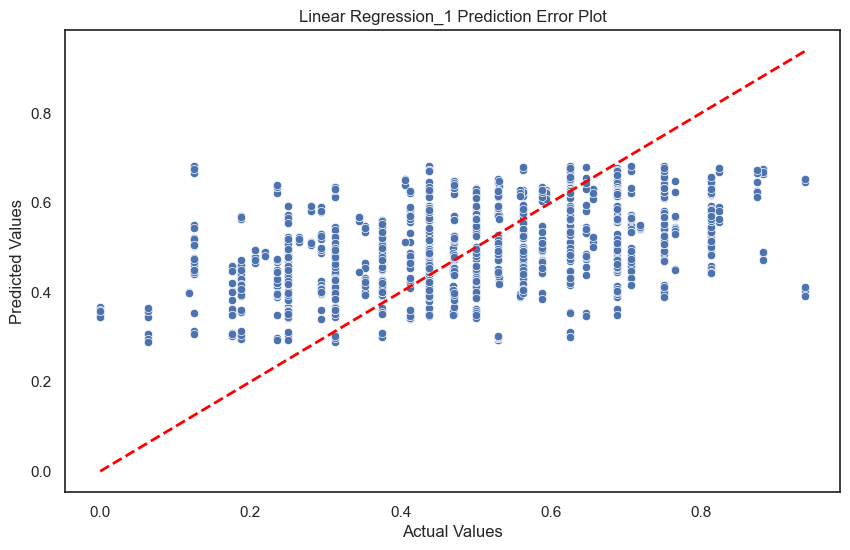

In [97]:
lr_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=lr_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Linear Regression_1 Prediction Error Plot")

Text(0, 0.5, 'Residuals')

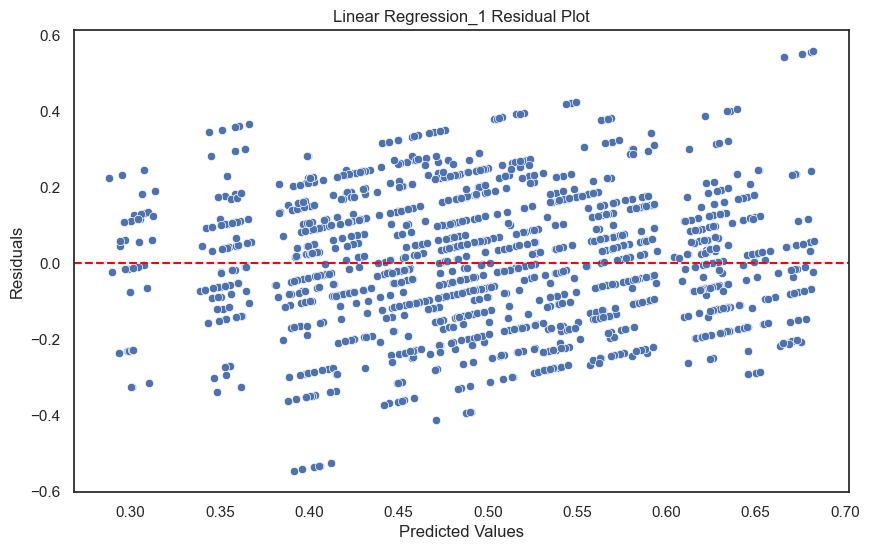

In [98]:
lr_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=lr_preds_1,
    y=lr_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("Linear Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

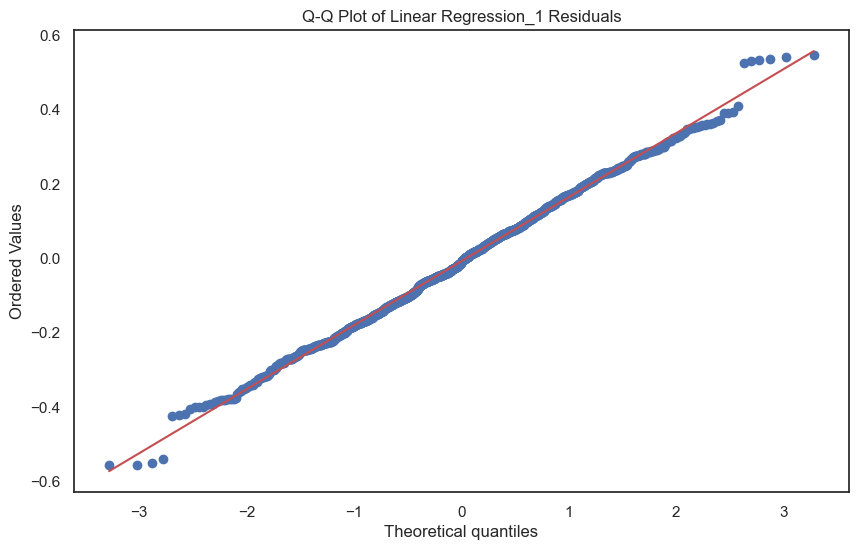

In [99]:
lr_resids_1 = y1_test - lr_preds_1
lr_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(lr_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Linear Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

lr_qq_plot_1.savefig(f'{project_data_exports_path}/lr_qq_plot_1.png', dpi=300, bbox_inches='tight')

# KNN

In [100]:
knn_pipe_1 = Pipeline([
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        numeric_transformer=StandardScaler(),
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', KNeighborsRegressor())
])

knn_pipe_1.get_params()

knn_params_1 = [
    {
        'regressor__n_neighbors': np.arange(1, 100, 5),
        'regressor__weights': ['uniform', 'distance'],
        'regressor__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']}
]

knn_gs_1 = GridSearchCV(estimator=knn_pipe_1,
                        param_grid=knn_params_1,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

knn_scores_1 = cross_val_score(knn_gs_1,
                               X1_train,
                               y1_train,
                               cv=10,
                               scoring='neg_mean_squared_error',
                               verbose=1)
knn_rmse_scores_1 = np.sqrt(-knn_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {knn_rmse_scores_1}")
print(f"Average RMSE from CV: {knn_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {knn_rmse_scores_1.std():.4f}")

# Fit the model on the training set
knn_gs_1.fit(X1_train, y1_train)

# Extract best parameters and model
knn_best_params_1 = knn_gs_1.best_params_
knn_best_pipe_1 = knn_gs_1.best_estimator_

# Predict on the test set
knn_preds_1 = knn_gs_1.predict(X1_test)

# Calculate RMSE on the test set
knn_rmse_1 = float(np.sqrt(mean_squared_error(y1_test, knn_preds_1)))

# Report results
print(f"Best Parameters: {knn_best_params_1}")
print(f"Test RMSE: {knn_rmse_1:.4f}")

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

Cross-Validation RMSE Scores: [0.16809829 0.17139231 0.16031316 0.1769094  0.1661495  0.17400707
 0.16194107 0.17302314 0.1808713  0.17992582]
Average RMSE from CV: 0.1713
Standard Deviation of RMSE from CV: 0.0067
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'regressor__metric': 'manhattan', 'regressor__n_neighbors': 16, 'regressor__weights': 'distance'}
Test RMSE: 0.1734


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/User

In [101]:
# Generate learning curve data

# knn_train_sizes_1, knn_train_scores_1, knn_test_scores_1 = learning_curve(
#     knn_pipe_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# knn_train_rmse_1 = np.sqrt(-knn_train_scores_1)
# knn_test_rmse_1 = np.sqrt(-knn_test_scores_1)


In [102]:
# Plot the learning curve
# knn_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=knn_train_sizes_1, y=knn_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=knn_train_sizes_1, y=knn_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     knn_train_sizes_1,
#     knn_train_rmse_1.mean(axis=1) - knn_train_rmse_1.std(axis=1),
#     knn_train_rmse_1.mean(axis=1) + knn_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     knn_train_sizes_1,
#     knn_test_rmse_1.mean(axis=1) - knn_test_rmse_1.std(axis=1),
#     knn_test_rmse_1.mean(axis=1) + knn_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for KNearest Neighbor Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# knn_learning_curve_plot_1.tight_layout()
# knn_learning_curve_plot_1.savefig(f'{project_data_exports_path}/knn_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'KNN Regression_1 Prediction Error Plot')

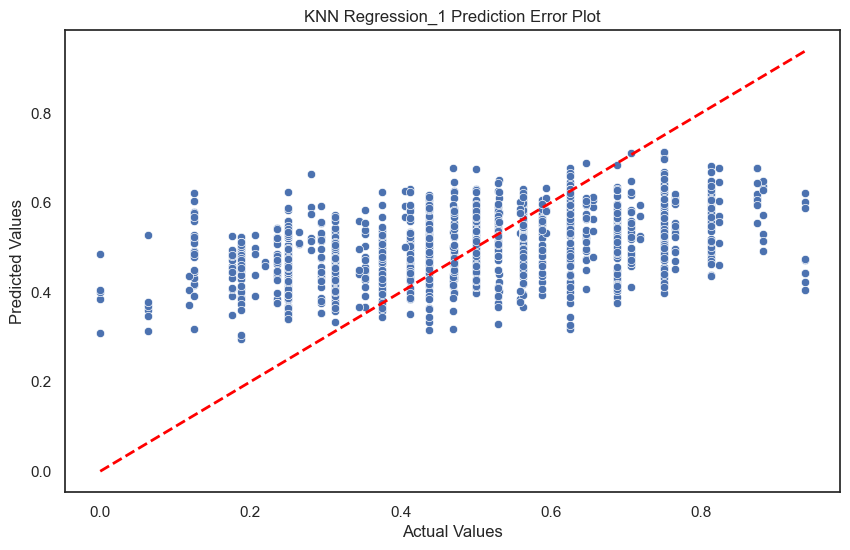

In [103]:
# Actual vs. Predicted
knn_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=knn_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("KNN Regression_1 Prediction Error Plot")


Text(0, 0.5, 'Residuals')

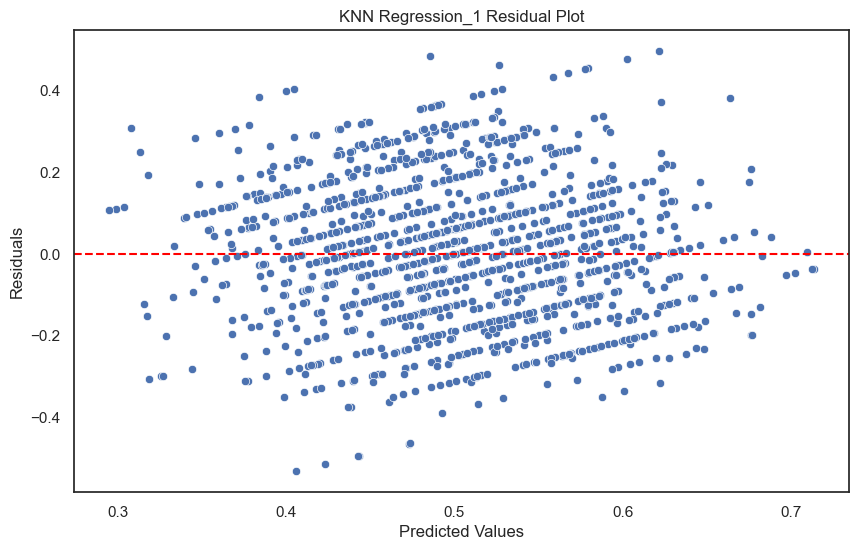

In [104]:
# Residual Plot
knn_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=knn_preds_1,
    y=knn_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("KNN Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")


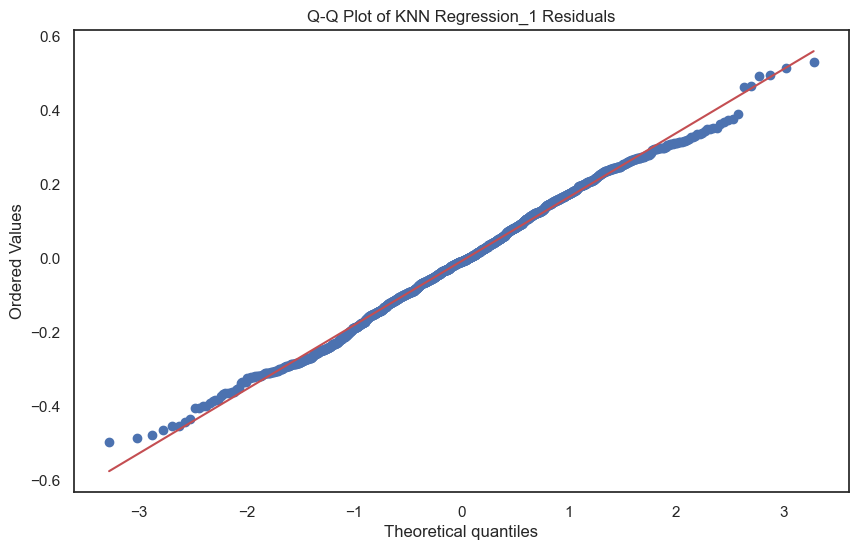

In [105]:
knn_resids_1 = y1_test - knn_preds_1
knn_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(knn_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of KNN Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

knn_qq_plot_1.savefig(f'{project_data_exports_path}/knn_qq_plot_1.png', dpi=300, bbox_inches='tight')

# Decision Tree

In [106]:
tree_pipe_1 = Pipeline([
    ('preprocessor', create_preprocessor(
        is_tree_based=True,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', DecisionTreeRegressor())
])

tree_pipe_1.get_params()

tree_params_1 = [
    {
        'regressor__max_depth': [2, 3],
        'regressor__min_samples_split': [2, 3, 4],
        'regressor__random_state': [0]
    }]

tree_gs_1 = GridSearchCV(estimator=tree_pipe_1,
                         param_grid=tree_params_1,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose=1)

# Calculate RMSE using cross_val_score
tree_scores_1 = cross_val_score(
    tree_gs_1,
    X1_train,
    y1_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
tree_rmse_scores_1 = np.sqrt(-tree_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {tree_rmse_scores_1}")
print(f"Average RMSE from CV: {tree_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {tree_rmse_scores_1.std():.4f}")

# Fit the model on the training set
tree_gs_1.fit(X1_train, y1_train)

# Extract best parameters and model
tree_best_params_1 = tree_gs_1.best_params_
tree_best_pipe_1 = tree_gs_1.best_estimator_

# Predict on the test set
tree_preds_1 = tree_gs_1.predict(X1_test)

# Calculate RMSE on the test set
tree_rmse_1 = np.sqrt(mean_squared_error(y1_test, tree_preds_1))

# Report results
print(f"Best Parameters: {tree_best_params_1}")
print(f"Test RMSE: {tree_rmse_1:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Cross-Validation RMSE Scores: [0.17855604 0.18182245 0.16354435 0.18653215 0.17430744 0.19154833
 0.17479302 0.18467313 0.1911188  0.18703625]
Average RMSE from CV: 0.1814
Standard Deviation of RMSE from CV: 0.0083
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__random_state': 0}
Test RMSE: 0.18

In [107]:
# Extract the trained DecisionTreeRegressor
optimized_tree_1 = tree_best_pipe_1.named_steps['regressor']

# Access the parameters of the optimized tree
best_tree_params_1 = optimized_tree_1.get_params()

# Display the best parameters
print("Best Parameters for the Decision Tree_1:")
for param, value in best_tree_params_1.items():
    print(f"{param}: {value}")

Best Parameters for the Decision Tree_1:
ccp_alpha: 0.0
criterion: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 0
splitter: best


In [108]:
# Get feature importance scores
tree_feature_importances_1 = optimized_tree_1.feature_importances_

# Combine with feature names (including those created by OneHotEncoder)
tree_preprocessed_features_1 = tree_best_pipe_1.named_steps['preprocessor'].transformers_

tree_categorical_features_1 = tree_best_pipe_1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()

tree_all_features_1 = list(selected_numeric_features) + list(tree_categorical_features_1)

# Create a DataFrame for readability
tree_importance_df_1 = pd.DataFrame({
    'Feature': tree_all_features_1,
    'Importance': tree_feature_importances_1
}).sort_values(by='Importance', ascending=False)



# Display the feature importances
print("Feature Importances:")
print(tree_importance_df_1)

Feature Importances:
                              Feature  Importance
25          team_jacksonville-jaguars    0.351115
1                              season    0.248139
26            team_kansas-city-chiefs    0.207909
35                 team_new-york-jets    0.192836
31             team_minnesota-vikings    0.000000
23                team_houston-texans    0.000000
24            team_indianapolis-colts    0.000000
27             team_las-vegas-raiders    0.000000
28          team_los-angeles-chargers    0.000000
29              team_los-angeles-rams    0.000000
30                team_miami-dolphins    0.000000
0                     cap_hit_pct_sum    0.000000
22             team_green-bay-packers    0.000000
33            team_new-orleans-saints    0.000000
34               team_new-york-giants    0.000000
36           team_philadelphia-eagles    0.000000
37           team_pittsburgh-steelers    0.000000
38           team_san-francisco-49ers    0.000000
39              team_seattle-

In [109]:
# Generate learning curve data

# tree_train_sizes_1, tree_train_scores_1, tree_test_scores_1 = learning_curve(
#     tree_pipe_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# tree_train_rmse_1 = np.sqrt(-tree_train_scores_1)
# tree_test_rmse_1 = np.sqrt(-tree_test_scores_1)


In [110]:
# Plot the learning curve
# tree_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=tree_train_sizes_1, y=tree_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=tree_train_sizes_1, y=tree_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     tree_train_sizes_1,
#     tree_train_rmse_1.mean(axis=1) - tree_train_rmse_1.std(axis=1),
#     tree_train_rmse_1.mean(axis=1) + tree_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     tree_train_sizes_1,
#     tree_test_rmse_1.mean(axis=1) - tree_test_rmse_1.std(axis=1),
#     tree_test_rmse_1.mean(axis=1) + tree_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for Decision Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# tree_learning_curve_plot_1.tight_layout()
# tree_learning_curve_plot_1.savefig(f'{project_data_exports_path}/tree_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Feature')

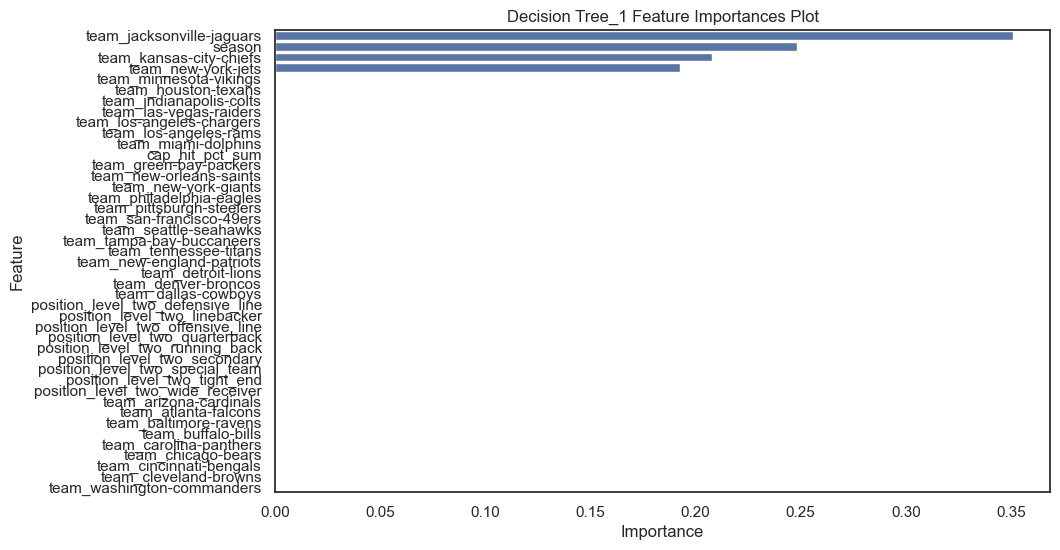

In [111]:
tree_feat_imp_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
sns.barplot(
    data=tree_importance_df_1,
    x='Importance',
    y='Feature',
    ax=ax
)
ax.set_title("Decision Tree_1 Feature Importances Plot")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

Text(0.5, 1.0, 'Decision Tree Regression_1 Prediction Error Plot')

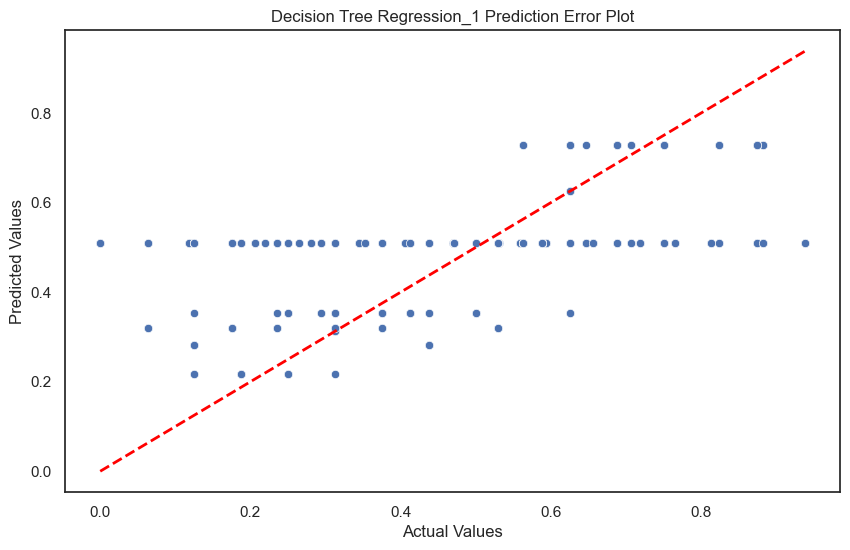

In [112]:
tree_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=tree_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Decision Tree Regression_1 Prediction Error Plot")

Text(0, 0.5, 'Residuals')

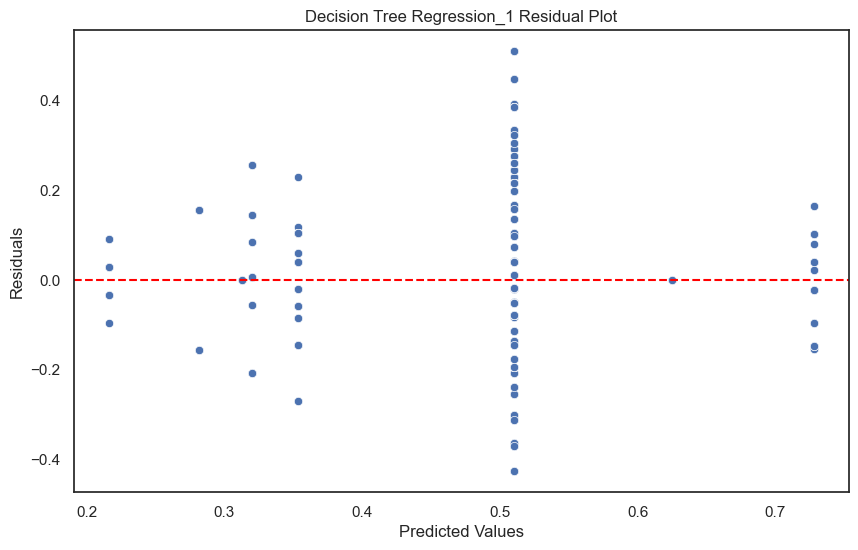

In [113]:
tree_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=tree_preds_1,
    y=tree_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("Decision Tree Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

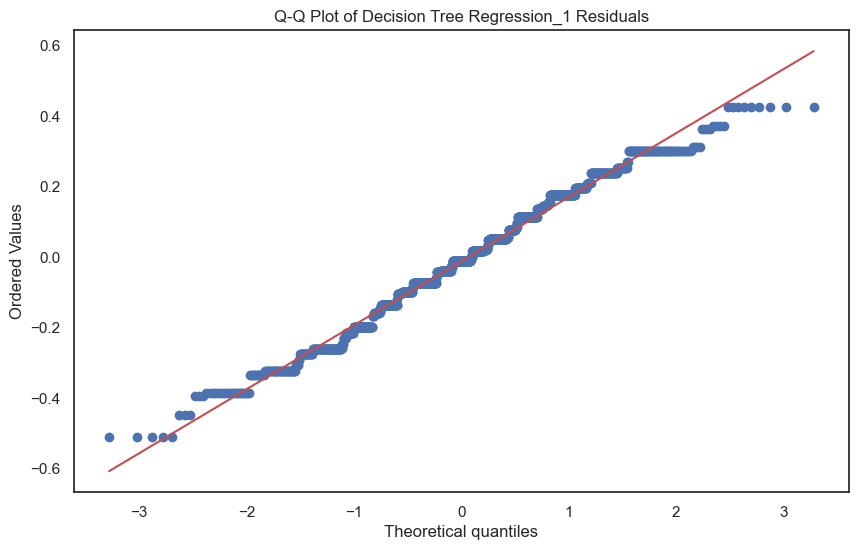

In [114]:
tree_resids_1 = y1_test - tree_preds_1
tree_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(tree_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Decision Tree Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

tree_qq_plot_1.savefig(f'{project_data_exports_path}/tree_qq_plot_1.png', dpi=300, bbox_inches='tight')

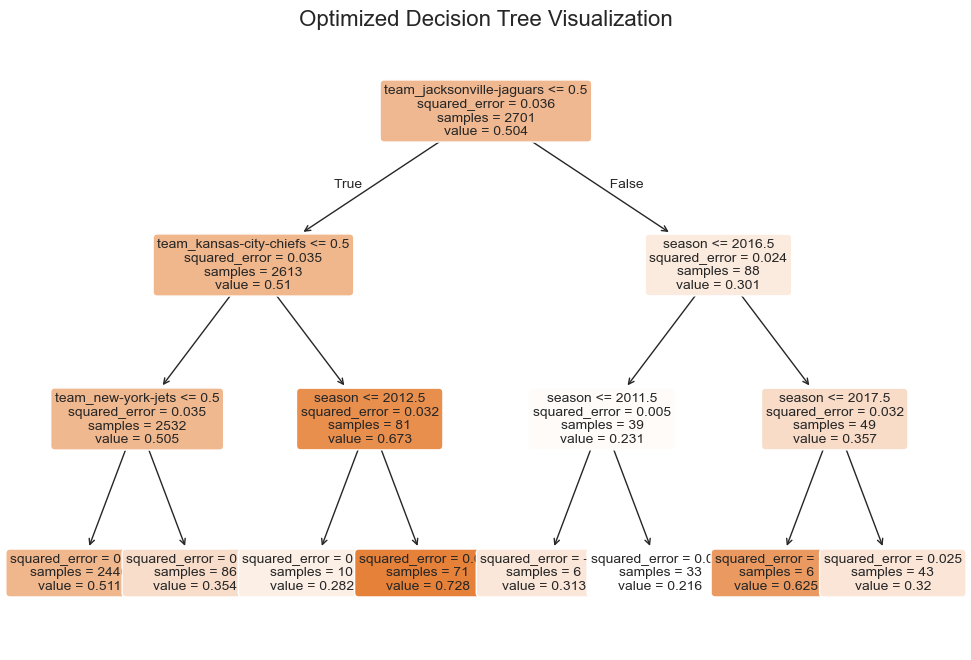

In [115]:
# Create the figure and axis
tree_plot_1, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize for clarity

# Plot the decision tree
plot_tree(
    tree_best_pipe_1.named_steps['regressor'],
    feature_names=tree_all_features_1,  # Use feature names for clarity
    filled=True,  # Color the nodes based on the output value
    rounded=True,  # Use rounded nodes for better readability
    fontsize=10,  # Adjust font size
    ax=ax  # Pass the axis for plotting
)

# Add a title to the plot
ax.set_title("Optimized Decision Tree Visualization", fontsize=16)
tree_plot_1.savefig(f'{project_data_exports_path}/tree_plot_1.png', dpi=300, bbox_inches='tight')

# Random Forests

In [116]:
rf_pipe_1 = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=True,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features
    )),
    ('regressor', RandomForestRegressor())
])
rf_pipe_1.get_params()

rf_params_1 = [
    {
        'regressor__n_estimators': [100, 500, 1000],
        'regressor__max_depth': [3, 5, 10, None],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__bootstrap': [True, False],
        'regressor__random_state': [0]
    }]

rf_gs_1 = GridSearchCV(estimator=tree_pipe_1,
                       param_grid=tree_params_1,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1)

# Calculate RMSE using cross_val_score
rf_scores_1 = cross_val_score(
    rf_gs_1,
    X1_train,
    y1_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
rf_rmse_scores_1 = np.sqrt(-rf_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {rf_rmse_scores_1}")
print(f"Average RMSE from CV: {rf_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {rf_rmse_scores_1.std():.4f}")

# Fit the model on the training set
rf_gs_1.fit(X1_train, y1_train)

# Extract best parameters and model
rf_best_params_1 = rf_gs_1.best_params_
rf_best_pipe_1 = rf_gs_1.best_estimator_

# Predict on the test set
rf_preds_1 = rf_gs_1.predict(X1_test)

# Calculate RMSE on the test set
rf_rmse_1 = np.sqrt(mean_squared_error(y1_test, rf_preds_1))

# Report results
print(f"Best Parameters: {rf_best_params_1}")
print(f"Test RMSE: {rf_rmse_1:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Cross-Validation RMSE Scores: [0.17855604 0.18182245 0.16354435 0.18653215 0.17430744 0.19154833
 0.17479302 0.18467313 0.1911188  0.18703625]
Average RMSE from CV: 0.1814
Standard Deviation of RMSE from CV: 0.0083
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__random_state': 0}
Test RMSE: 0.18

In [117]:
# Extract the trained DecisionTreeRegressor
optimized_rf_1 = rf_best_pipe_1.named_steps['regressor']

# Access the parameters of the optimized tree
best_rf_params_1 = optimized_rf_1.get_params()

# Display the best parameters
print("Best Parameters for the Decision Tree_1:")
for param, value in best_rf_params_1.items():
    print(f"{param}: {value}")

Best Parameters for the Decision Tree_1:
ccp_alpha: 0.0
criterion: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 0
splitter: best


In [118]:
# Get feature importance scores
rf_feature_importances_1 = optimized_rf_1.feature_importances_

# Combine with feature names (including those created by OneHotEncoder)
rf_preprocessed_features_1 = rf_best_pipe_1.named_steps['preprocessor'].transformers_

rf_categorical_features_1 = rf_best_pipe_1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()

rf_all_features_1 = list(selected_numeric_features) + list(rf_categorical_features_1)

# Create a DataFrame for readability
rf_importance_df_1 = pd.DataFrame({
    'Feature': rf_all_features_1,
    'Importance': rf_feature_importances_1
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(rf_importance_df_1)

Feature Importances:
                              Feature  Importance
25          team_jacksonville-jaguars    0.351115
1                              season    0.248139
26            team_kansas-city-chiefs    0.207909
35                 team_new-york-jets    0.192836
31             team_minnesota-vikings    0.000000
23                team_houston-texans    0.000000
24            team_indianapolis-colts    0.000000
27             team_las-vegas-raiders    0.000000
28          team_los-angeles-chargers    0.000000
29              team_los-angeles-rams    0.000000
30                team_miami-dolphins    0.000000
0                     cap_hit_pct_sum    0.000000
22             team_green-bay-packers    0.000000
33            team_new-orleans-saints    0.000000
34               team_new-york-giants    0.000000
36           team_philadelphia-eagles    0.000000
37           team_pittsburgh-steelers    0.000000
38           team_san-francisco-49ers    0.000000
39              team_seattle-

In [119]:
# Generate learning curve data

# rf_train_sizes_1, rf_train_scores_1, rf_test_scores_1 = learning_curve(
#     rf_pipe_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# rf_train_rmse_1 = np.sqrt(-rf_train_scores_1)
# rf_test_rmse_1 = np.sqrt(-rf_test_scores_1)



In [120]:
# Plot the learning curve
# rf_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=rf_train_sizes_1, y=rf_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=rf_train_sizes_1, y=rf_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     rf_train_sizes_1,
#     rf_train_rmse_1.mean(axis=1) - rf_train_rmse_1.std(axis=1),
#     rf_train_rmse_1.mean(axis=1) + rf_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     rf_train_sizes_1,
#     rf_test_rmse_1.mean(axis=1) - rf_test_rmse_1.std(axis=1),
#     rf_test_rmse_1.mean(axis=1) + rf_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for Random Forest Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# rf_learning_curve_plot_1.tight_layout()
# rf_learning_curve_plot_1.savefig(f'{project_data_exports_path}/rf_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Feature')

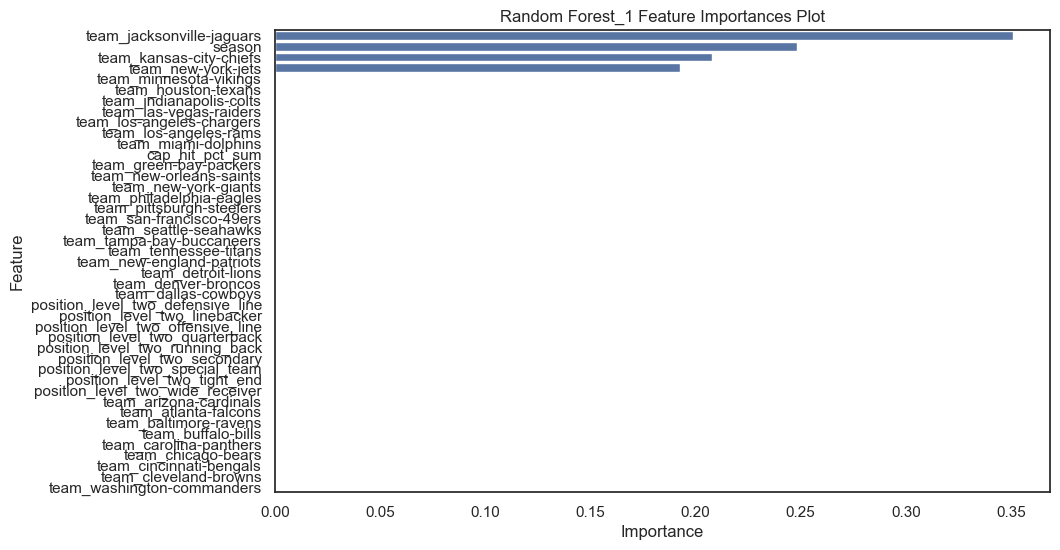

In [121]:
rf_feat_imp_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
sns.barplot(
    data=rf_importance_df_1,
    x='Importance',
    y='Feature',
    ax=ax
)
ax.set_title("Random Forest_1 Feature Importances Plot")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

Text(0.5, 1.0, 'Random Forest Regression_1 Prediction Error Plot')

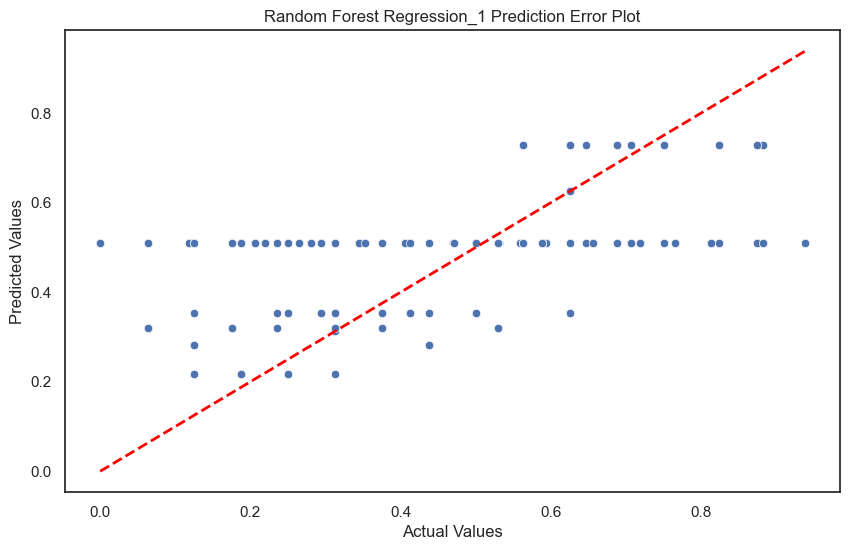

In [122]:
rf_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=rf_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Random Forest Regression_1 Prediction Error Plot")

Text(0, 0.5, 'Residuals')

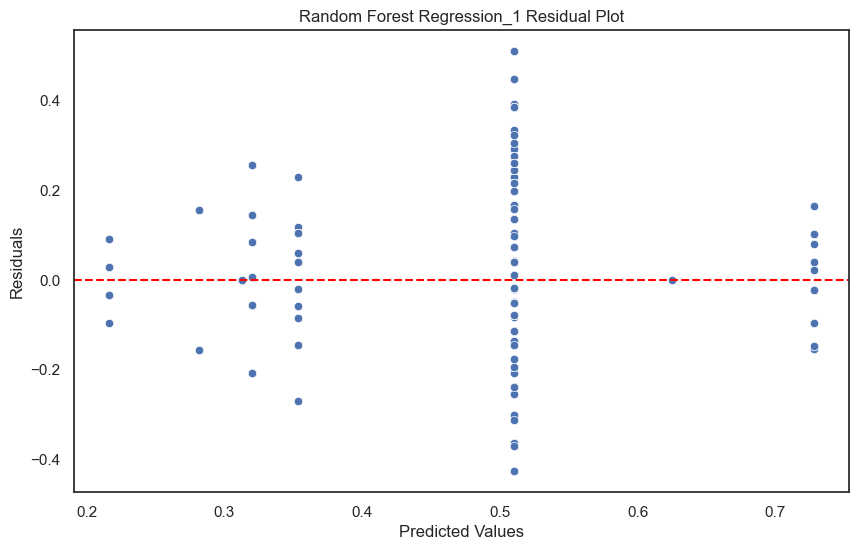

In [123]:
rf_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=rf_preds_1,
    y=rf_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("Random Forest Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

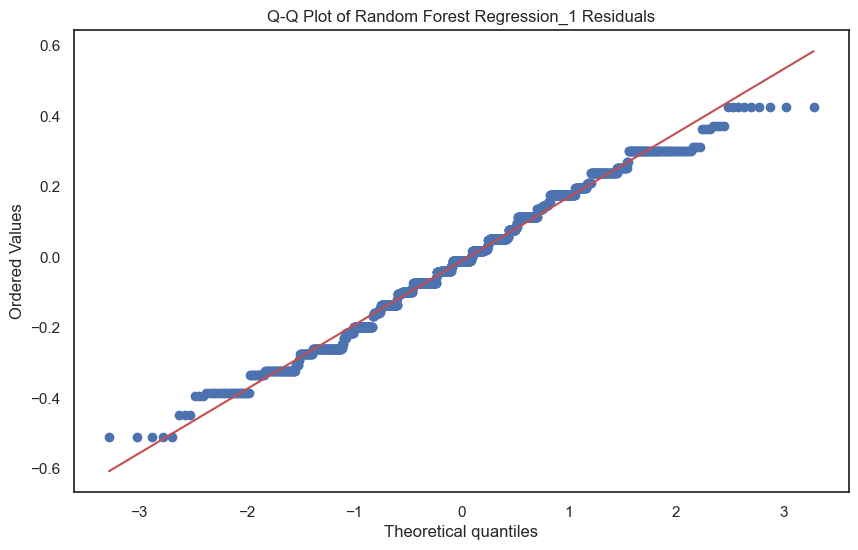

In [124]:
rf_resids_1 = y1_test - rf_preds_1
rf_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(rf_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Random Forest Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

rf_qq_plot_1.savefig(f'{project_data_exports_path}/rf_qq_plot_1.png', dpi=300, bbox_inches='tight')

# Ridge

In [125]:
ridge_alpha_plot_preprocessor = create_preprocessor(
    is_tree_based=False,
    selected_numeric_features=selected_numeric_features,
    selected_categorical_features=selected_categorical_features,
)

# Fit the preprocessor on the training data
ridge_alpha_plot_preprocessor.fit(X1_train)

# Get the transformed feature names
ridge_alpha_feature_names_transformed = ridge_alpha_plot_preprocessor.get_feature_names_out()

# Transform the training data
ridge_alpha_X1_train_transformed = ridge_alpha_plot_preprocessor.transform(X1_train)

# Initialize the dictionary to store coefficients
ridge_alpha_coefficients = {feature: [] for feature in ridge_alpha_feature_names_transformed}
ridge_alpha_coefficients['alpha'] = []

#Define a range of alpha values
n_ridge_alphas = 500
ridge_alpha_values = np.logspace(-5, 5, n_ridge_alphas)


# Fit Ridge regression for each alpha
for alpha in ridge_alpha_values:
    ridge = Ridge(alpha=alpha, fit_intercept=True, max_iter=20000, solver='auto')
    ridge.fit(ridge_alpha_X1_train_transformed, y1_train)  # Use transformed data
    for i, feature in enumerate(ridge_alpha_feature_names_transformed):
        ridge_alpha_coefficients[feature].append(ridge.coef_[i])
    ridge_alpha_coefficients['alpha'].append(alpha)

ridge_alpha_coefficients_df = pd.DataFrame(ridge_alpha_coefficients)

ridge_alpha_coefficients_df_melted = ridge_alpha_coefficients_df.melt(id_vars='alpha', var_name='Feature', value_name='Coefficient')
ridge_alpha_coefficients_df_melted



,alpha,Feature,Coefficient
0,0.000010,num__cap_hit_pct_sum,0.003925
1,0.000010,num__cap_hit_pct_sum,0.003925
2,0.000011,num__cap_hit_pct_sum,0.003925
3,0.000011,num__cap_hit_pct_sum,0.003925
4,0.000012,num__cap_hit_pct_sum,0.003925
...,...,...,...
21495,83145.678058,cat__team_washington-commanders,-0.000074
21496,87072.248492,cat__team_washington-commanders,-0.000071
21497,91184.251961,cat__team_washington-commanders,-0.000068
21498,95490.445575,cat__team_washington-commanders,-0.000065


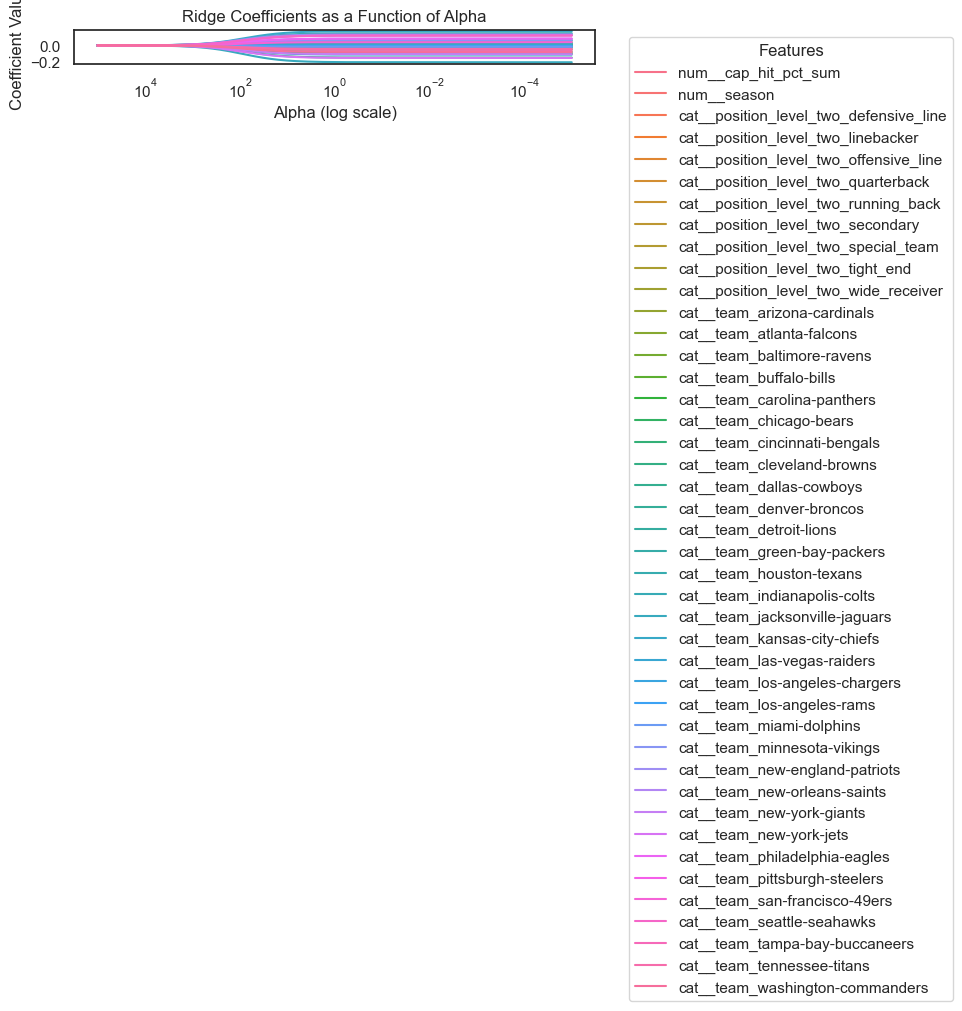

In [126]:
ridge_alpha_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.lineplot(
    data=ridge_alpha_coefficients_df_melted,
    x='alpha',
    y='Coefficient',
    hue='Feature',
    ax=ax)

# Customize the plot
ax.set_xscale('log')  # Use logarithmic scale for alpha
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_title('Ridge Coefficients as a Function of Alpha')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

ridge_alpha_plot_1.tight_layout()
ridge_alpha_plot_1.savefig(f'{project_data_exports_path}/ridge_alpha_plot_1.png', dpi=300, bbox_inches='tight')

In [127]:
ridge_pipe_1 = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        # include_polynomials=True,
        # poly_degree=2
    )),
    ('regressor', Ridge())
])

ridge_pipe_1.get_params()

ridge_params_1 = [
    {
        # Polynomial features
        # 'preprocessor__polynomials__poly__degree': [1, 2, 3],  # Polynomial degrees to test
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Different scalers

        # Ridge regression hyperparameters
        'regressor__alpha': np.logspace(1, 3, 100),
        'regressor__fit_intercept': [True, False],
        'regressor__solver': ['auto', 'lsqr', 'sag', 'saga'],
        'regressor__max_iter': [20000]  # Increased iteration limits
    }
]

ridge_gs_1 = GridSearchCV(estimator=ridge_pipe_1,
                        param_grid=ridge_params_1,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

# Calculate RMSE using cross_val_score
ridge_scores_1 = cross_val_score(
    ridge_gs_1,
    X1_train,
    y1_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
ridge_rmse_scores_1 = np.sqrt(-ridge_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {ridge_rmse_scores_1}")
print(f"Average RMSE from CV: {ridge_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {ridge_rmse_scores_1.std():.4f}")

# Fit the model on the training set
ridge_gs_1.fit(X1_train, y1_train)

# Extract best parameters and model
ridge_best_params_1 = ridge_gs_1.best_params_
ridge_best_pipe_1 = ridge_gs_1.best_estimator_

# Predict on the test set
ridge_preds_1 = ridge_gs_1.predict(X1_test)

# Calculate RMSE on the test set
ridge_rmse_1 = np.sqrt(mean_squared_error(y1_test, ridge_preds_1))

# Report results
print(f"Best Parameters: {ridge_best_params_1}")
print(f"Test RMSE: {ridge_rmse_1:.4f}")

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

Cross-Validation RMSE Scores: [0.16190169 0.17129326 0.1508159  0.17363099 0.16921653 0.18246988
 0.15959323 0.17048628 0.17326442 0.18085641]
Average RMSE from CV: 0.1694
Standard Deviation of RMSE from CV: 0.0092
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Parameters: {'preprocessor__num': MinMaxScaler(), 'regressor__alpha': 10.0, 'regressor__fit_intercept': True, 'regressor__max_iter': 20000, 'regressor__solver': 'auto'}
Test RMSE: 0.1722


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


1000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/U

In [128]:
# Get the transformed feature names after one-hot encoding and scaling
ridge_feature_names_1_transformed = ridge_best_pipe_1.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Ridge Regression model
ridge_coefs_1 = ridge_best_pipe_1.named_steps['regressor'].coef_.flatten()
ridge_intercept_1 = ridge_best_pipe_1.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
ridge_coef_1_df = pd.DataFrame({'Feature': ridge_feature_names_1_transformed, 'Coefficient': ridge_coefs_1})

# Add the intercept row
ridge_intercept_1_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [ridge_intercept_1]})
ridge_coef_1_df = pd.concat([ridge_intercept_1_df, ridge_coef_1_df], ignore_index=True)

# Display the DataFrame with coefficients
ridge_coef_1_df.to_csv(f'{project_data_exports_path}/ridge_coef_1_df.csv')
ridge_coef_1_df

,Feature,Coefficient
0,Intercept,0.500754
1,num__cap_hit_pct_sum,0.017038
2,num__season,-0.004936
3,cat__position_level_two_defensive_line,0.002341
4,cat__position_level_two_linebacker,0.000841
5,cat__position_level_two_offensive_line,-0.000079
6,cat__position_level_two_quarterback,0.002439
7,cat__position_level_two_running_back,-0.002254
8,cat__position_level_two_secondary,-0.005855
9,cat__position_level_two_special_team,0.002391


In [129]:
# Generate learning curve data

# ridge_train_sizes_1, ridge_train_scores_1, ridge_test_scores_1 = learning_curve(
#     ridge_gs_1,
#     X1_train,
#     y1_train,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     verbose=0
# )
#
#
#
# # Convert scores to RMSE
# ridge_train_rmse_1 = np.sqrt(-ridge_train_scores_1)
# ridge_test_rmse_1 = np.sqrt(-ridge_test_scores_1)



In [130]:
# Plot the learning curve
# ridge_learning_curve_plot_1, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')
# sns.lineplot(x=ridge_train_sizes_1, y=ridge_train_rmse_1.mean(axis=1), label='Training RMSE', ax=ax)
# sns.lineplot(x=ridge_train_sizes_1, y=ridge_test_rmse_1.mean(axis=1), label='Validation RMSE', ax=ax)
# ax.fill_between(
#     ridge_train_sizes_1,
#     ridge_train_rmse_1.mean(axis=1) - ridge_train_rmse_1.std(axis=1),
#     ridge_train_rmse_1.mean(axis=1) + ridge_train_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Training RMSE Std Dev'
# )
#
# ax.fill_between(
#     ridge_train_sizes_1,
#     ridge_test_rmse_1.mean(axis=1) - ridge_test_rmse_1.std(axis=1),
#     ridge_test_rmse_1.mean(axis=1) + ridge_test_rmse_1.std(axis=1),
#     alpha=0.2,
#     label='Validation RMSE Std Dev'
# )
#
# ax.set_title("Learning Curve for Ridge Regression")
# ax.set_xlabel("Training Set Size")
# ax.set_ylabel("Root Mean Squared Error (RMSE)")
# ax.legend()
#
# ridge_learning_curve_plot_1.tight_layout()
# ridge_learning_curve_plot_1.savefig(f'{project_data_exports_path}/ridge_learning_curve_plot_1.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Ridge Regression_1 Prediction Error Plot')

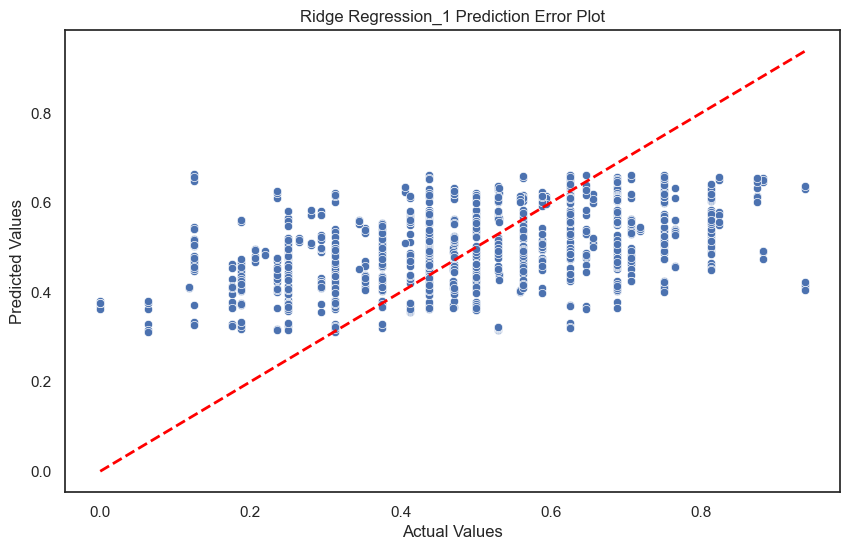

In [131]:
ridge_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=ridge_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Ridge Regression_1 Prediction Error Plot")

Text(0, 0.5, 'Residuals')

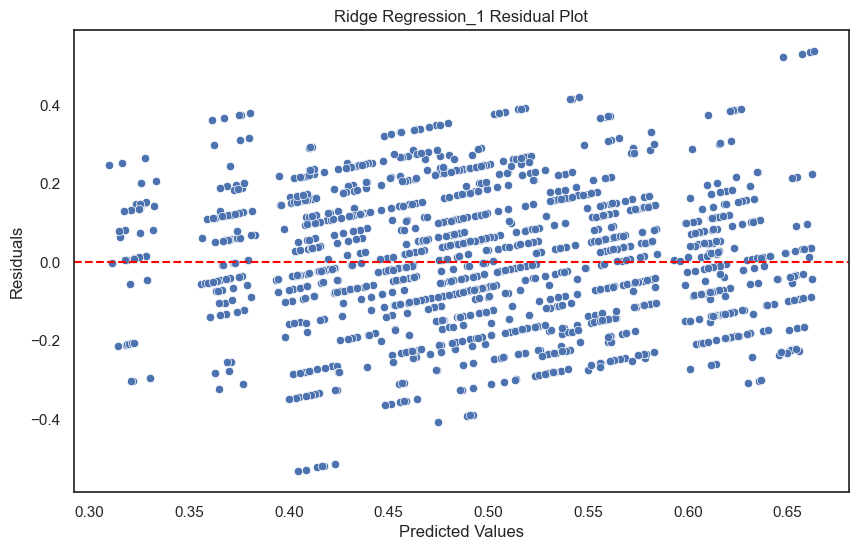

In [132]:
ridge_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=ridge_preds_1,
    y=ridge_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("Ridge Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

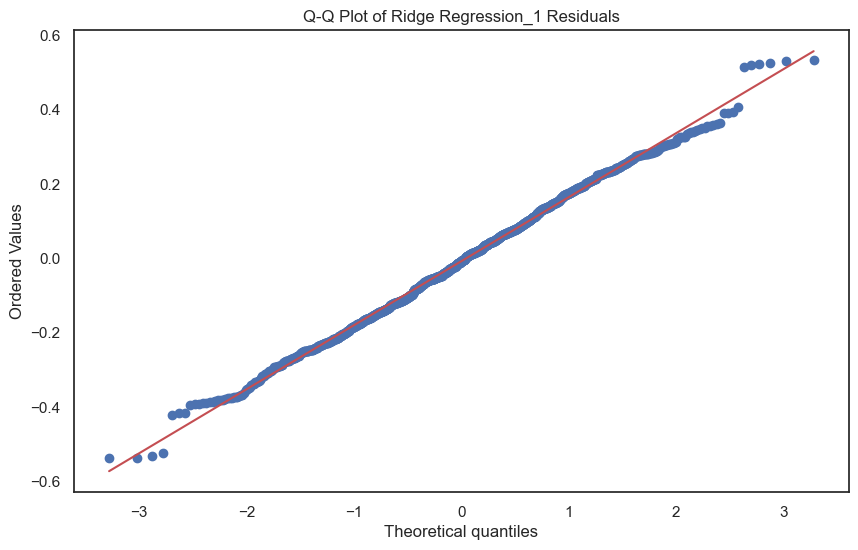

In [133]:
ridge_resids_1 = y1_test - ridge_preds_1
ridge_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(ridge_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of Ridge Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

ridge_qq_plot_1.savefig(f'{project_data_exports_path}/ridge_qq_plot_1.png', dpi=300, bbox_inches='tight')

# LASSO

In [134]:
lasso_alpha_plot_preprocessor = create_preprocessor(
    is_tree_based=False,
    selected_numeric_features=selected_numeric_features,
    selected_categorical_features=selected_categorical_features,
)

# Fit the preprocessor on the training data
lasso_alpha_plot_preprocessor.fit(X1_train)

# Get the transformed feature names
lasso_alpha_feature_names_transformed = lasso_alpha_plot_preprocessor.get_feature_names_out()

# Transform the training data
lasso_alpha_X1_train_transformed = lasso_alpha_plot_preprocessor.transform(X1_train)

# Initialize the dictionary to store coefficients
lasso_alpha_coefficients = {feature: [] for feature in lasso_alpha_feature_names_transformed}
lasso_alpha_coefficients['alpha'] = []

#Define a range of alpha values
n_lasso_alphas = 1000
lasso_alpha_values = np.logspace(-10, 7, n_lasso_alphas)


# Fit Ridge regression for each alpha
for alpha in lasso_alpha_values:
    lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=20000)
    lasso.fit(lasso_alpha_X1_train_transformed, y1_train)  # Use transformed data
    for i, feature in enumerate(lasso_alpha_feature_names_transformed):
        lasso_alpha_coefficients[feature].append(lasso.coef_[i])
    lasso_alpha_coefficients['alpha'].append(alpha)

lasso_alpha_coefficients_df = pd.DataFrame(lasso_alpha_coefficients)

lasso_alpha_coefficients_df_melted = lasso_alpha_coefficients_df.melt(id_vars='alpha', var_name='Feature', value_name='Coefficient')
lasso_alpha_coefficients_df_melted

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7265592316717004, tolerance: 0.009814570909959292

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7265591608166488, tolerance: 0.009814570909959292

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7265591997717991, tolerance: 0.009814570909959292

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.

,alpha,Feature,Coefficient
0,1.000000e-10,num__cap_hit_pct_sum,0.003926
1,1.039961e-10,num__cap_hit_pct_sum,0.003926
2,1.081519e-10,num__cap_hit_pct_sum,0.003926
3,1.124737e-10,num__cap_hit_pct_sum,0.003926
4,1.169683e-10,num__cap_hit_pct_sum,0.003926
...,...,...,...
42995,8.549327e+06,cat__team_washington-commanders,-0.000000
42996,8.890966e+06,cat__team_washington-commanders,-0.000000
42997,9.246257e+06,cat__team_washington-commanders,-0.000000
42998,9.615746e+06,cat__team_washington-commanders,-0.000000


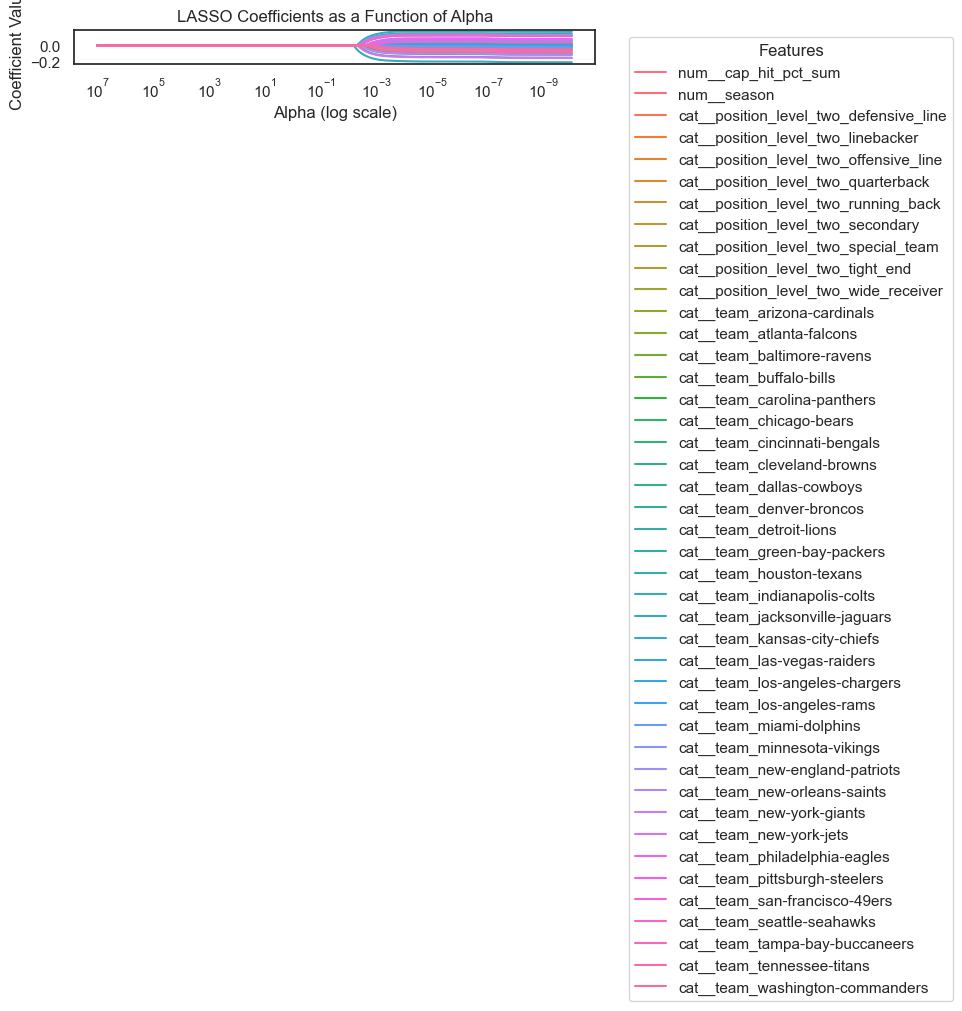

In [135]:
lasso_alpha_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.lineplot(
    data=lasso_alpha_coefficients_df_melted,
    x='alpha',
    y='Coefficient',
    hue='Feature',
    ax=ax)

# Customize the plot
ax.set_xscale('log')  # Use logarithmic scale for alpha
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_title('LASSO Coefficients as a Function of Alpha')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

lasso_alpha_plot_1.tight_layout()
lasso_alpha_plot_1.savefig(f'{project_data_exports_path}/lasso_alpha_plot_1.png', dpi=300, bbox_inches='tight')

In [136]:
lasso_pipe_1 = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        # include_polynomials=True,
        # poly_degree=2
    )),
    ('regressor', Lasso())
])

lasso_pipe_1.get_params()

lasso_params_1 = [
    {
        # Polynomial features
        # 'preprocessor__polynomials__poly__degree': [1, 2, 3],  # Polynomial degrees to test
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Different scalers

        # Ridge regression hyperparameters
        'regressor__alpha': np.logspace(-3, -1, 100),
        'regressor__fit_intercept': [True, False],
        # 'regressor__solver': ['auto', 'lsqr', 'sag', 'saga'],
        'regressor__max_iter': [20000]  # Increased iteration limits
    }
]

lasso_gs_1 = GridSearchCV(estimator=lasso_pipe_1,
                        param_grid=lasso_params_1,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

# Calculate RMSE using cross_val_score
lasso_scores_1 = cross_val_score(
    lasso_gs_1,
    X1_train,
    y1_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
lasso_rmse_scores_1 = np.sqrt(-lasso_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {lasso_rmse_scores_1}")
print(f"Average RMSE from CV: {lasso_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {lasso_rmse_scores_1.std():.4f}")

# Fit the model on the training set
lasso_gs_1.fit(X1_train, y1_train)

# Extract best parameters and model
lasso_best_params_1 = lasso_gs_1.best_params_
lasso_best_pipe_1 = lasso_gs_1.best_estimator_

# Predict on the test set
lasso_preds_1 = lasso_gs_1.predict(X1_test)

# Calculate RMSE on the test set
lasso_rmse_1 = np.sqrt(mean_squared_error(y1_test, lasso_preds_1))

# Report results
print(f"Best Parameters: {lasso_best_params_1}")
print(f"Test RMSE: {lasso_rmse_1:.4f}")


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Cross-Validation RMSE Scores: [0.16530186 0.17268355 0.15129483 0.17616031 0.16824518 0.18241773
 0.16359247 0.17084329 0.17634237 0.18138178]
Average RMSE from CV: 0.1708
Standard Deviation of RMSE from CV: 0.0088
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'preprocessor__num': MinMaxScaler(), 'regressor__alpha': 0.001,

In [137]:
# Get the transformed feature names after one-hot encoding and scaling
lasso_feature_names_1_transformed = lasso_best_pipe_1.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Ridge Regression model
lasso_coefs_1 = lasso_best_pipe_1.named_steps['regressor'].coef_.flatten()
lasso_intercept_1 = lasso_best_pipe_1.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
lasso_coef_1_df = pd.DataFrame({'Feature': lasso_feature_names_1_transformed, 'Coefficient': lasso_coefs_1})

# Add the intercept row
lasso_intercept_1_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [lasso_intercept_1]})
lasso_coef_1_df = pd.concat([lasso_intercept_1_df, lasso_coef_1_df], ignore_index=True)

# Display the DataFrame with coefficients
lasso_coef_1_df.to_csv(f'{project_data_exports_path}/lasso_coef_1_df.csv')
lasso_coef_1_df

,Feature,Coefficient
0,Intercept,0.501494
1,num__cap_hit_pct_sum,0.000000
2,num__season,-0.000000
3,cat__position_level_two_defensive_line,0.000000
4,cat__position_level_two_linebacker,0.000000
5,cat__position_level_two_offensive_line,0.000000
6,cat__position_level_two_quarterback,0.000000
7,cat__position_level_two_running_back,-0.000000
8,cat__position_level_two_secondary,-0.000000
9,cat__position_level_two_special_team,-0.000000


Text(0.5, 1.0, 'LASSO Regression_1 Prediction Error Plot')

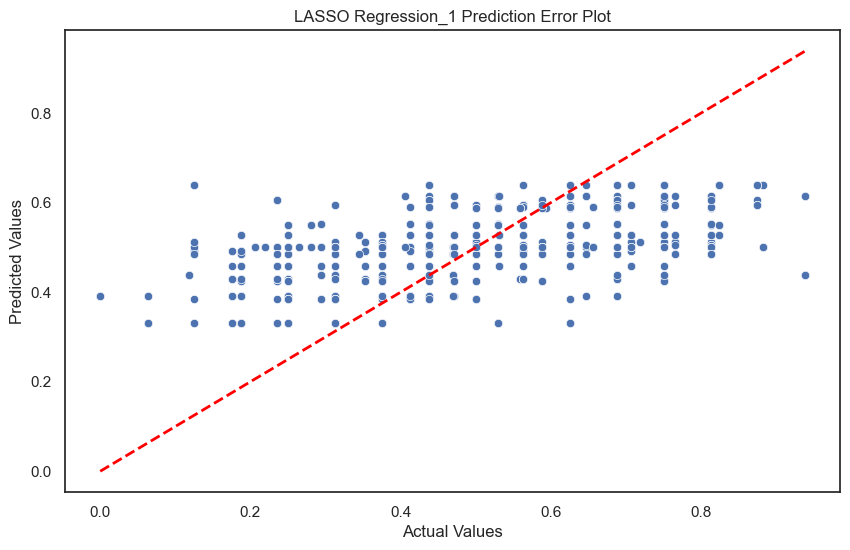

In [138]:
lasso_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=lasso_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("LASSO Regression_1 Prediction Error Plot")

Text(0, 0.5, 'Residuals')

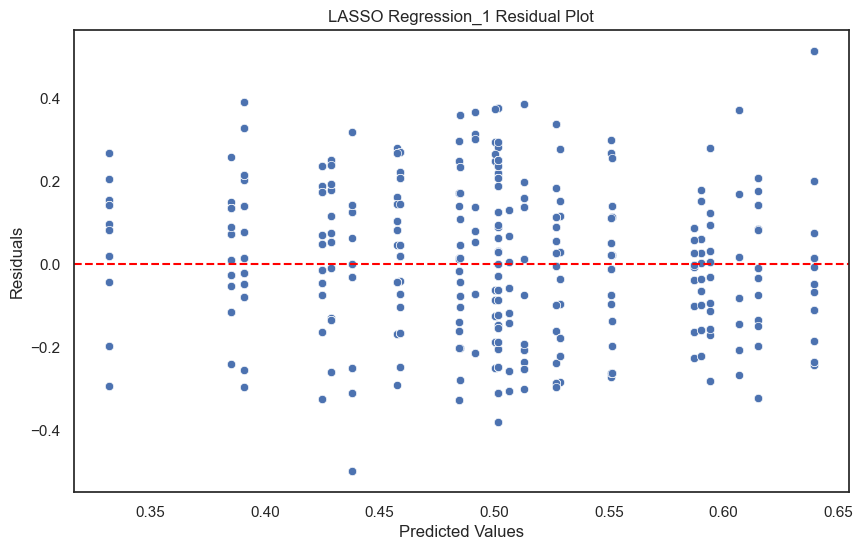

In [139]:
lasso_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=lasso_preds_1,
    y=lasso_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("LASSO Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

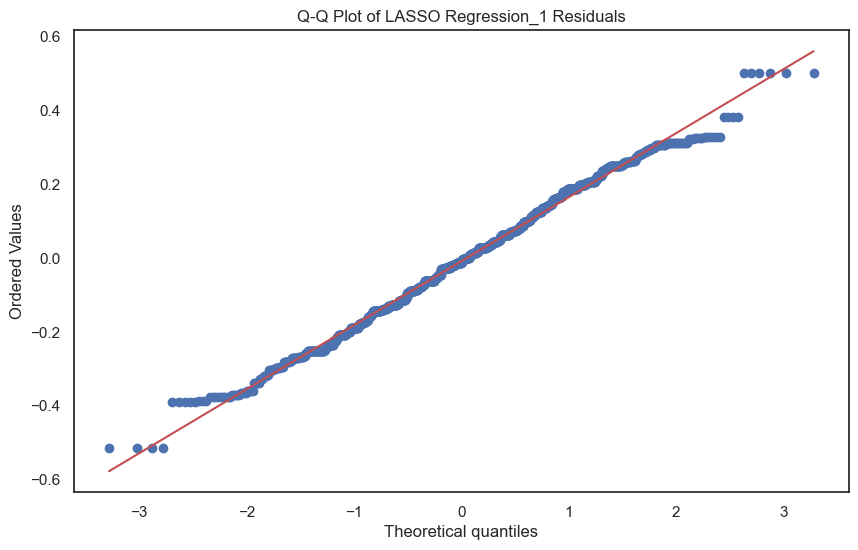

In [140]:
lasso_resids_1 = y1_test - lasso_preds_1
lasso_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(lasso_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of LASSO Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

lasso_qq_plot_1.savefig(f'{project_data_exports_path}/lasso_qq_plot_1.png', dpi=300, bbox_inches='tight')

# Elasticnet

In [141]:
# Define the preprocessor
elasticnet_alpha_plot_preprocessor = create_preprocessor(
    is_tree_based=False,
    selected_numeric_features=selected_numeric_features,
    selected_categorical_features=selected_categorical_features,
)

# Fit the preprocessor on the training data
elasticnet_alpha_plot_preprocessor.fit(X1_train)

# Get the transformed feature names
elasticnet_alpha_feature_names_transformed = elasticnet_alpha_plot_preprocessor.get_feature_names_out()

# Transform the training data
elasticnet_alpha_X1_train_transformed = elasticnet_alpha_plot_preprocessor.transform(X1_train)

# Initialize the dictionary to store coefficients
elasticnet_alpha_coefficients = {feature: [] for feature in elasticnet_alpha_feature_names_transformed}
elasticnet_alpha_coefficients['alpha'] = []

# Define a range of alpha values
n_elasticnet_alphas = 500
elasticnet_alpha_values = np.logspace(-10, 7, n_elasticnet_alphas)
l1_ratio = 0.5  # Fixing l1_ratio for this plot

# Fit ElasticNet for each alpha
for alpha in elasticnet_alpha_values:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True, max_iter=20000)
    elasticnet.fit(elasticnet_alpha_X1_train_transformed, y1_train)  # Use transformed data
    for i, feature in enumerate(elasticnet_alpha_feature_names_transformed):
        elasticnet_alpha_coefficients[feature].append(elasticnet.coef_[i])
    elasticnet_alpha_coefficients['alpha'].append(alpha)

# Create a dataframe
elasticnet_alpha_coefficients_df = pd.DataFrame(elasticnet_alpha_coefficients)

# Melt the dataframe for easy plotting
elasticnet_alpha_coefficients_df_melted = elasticnet_alpha_coefficients_df.melt(
    id_vars='alpha', var_name='Feature', value_name='Coefficient'
)

elasticnet_alpha_coefficients_df_melted

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7315920842938937, tolerance: 0.009814570909959292

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7315901981668986, tolerance: 0.009814570909959292

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7315877834347191, tolerance: 0.009814570909959292

/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.

,alpha,Feature,Coefficient
0,1.000000e-10,num__cap_hit_pct_sum,0.003926
1,1.081604e-10,num__cap_hit_pct_sum,0.003926
2,1.169866e-10,num__cap_hit_pct_sum,0.003926
3,1.265332e-10,num__cap_hit_pct_sum,0.003926
4,1.368587e-10,num__cap_hit_pct_sum,0.003926
...,...,...,...
21495,7.306804e+06,cat__team_washington-commanders,-0.000000
21496,7.903066e+06,cat__team_washington-commanders,-0.000000
21497,8.547985e+06,cat__team_washington-commanders,-0.000000
21498,9.245531e+06,cat__team_washington-commanders,-0.000000


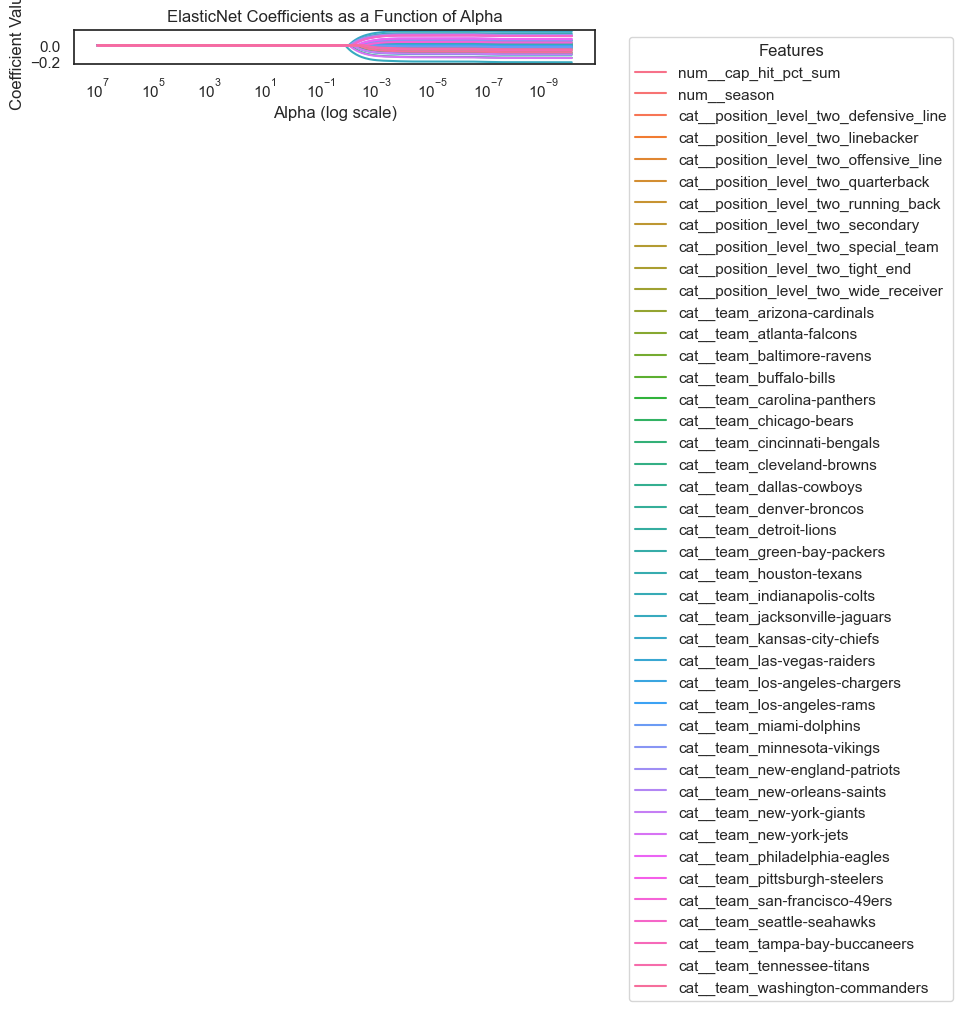

In [142]:
elasticnet_alpha_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.lineplot(
    data=elasticnet_alpha_coefficients_df_melted,
    x='alpha',
    y='Coefficient',
    hue='Feature',
    ax=ax)

# Customize the plot
ax.set_xscale('log')  # Use logarithmic scale for alpha
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_title('ElasticNet Coefficients as a Function of Alpha')
ax.set_xlabel('Alpha (log scale)')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

elasticnet_alpha_plot_1.tight_layout()
elasticnet_alpha_plot_1.savefig(f'{project_data_exports_path}/elasticnet_alpha_plot_1.png', dpi=300, bbox_inches='tight')

In [143]:
elasticnet_pipe_1 = Pipeline(steps=[
    ('preprocessor', create_preprocessor(
        is_tree_based=False,
        selected_categorical_features=selected_categorical_features,
        selected_numeric_features=selected_numeric_features,
        # include_polynomials=True,
        # poly_degree=2
    )),
    ('regressor', ElasticNet())
])

elasticnet_pipe_1.get_params()

elasticnet_params_1 = [
    {
        # Polynomial features
        # 'preprocessor__polynomials__poly__degree': [1, 2, 3],  # Polynomial degrees to test
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],  # Different scalers

        # ElasticNet regression hyperparameters
        'regressor__alpha': np.logspace(-3, -1, 100),
        'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        'regressor__fit_intercept': [True, False],
        'regressor__max_iter': [20000]  # Increased iteration limits
    }
]

elasticnet_gs_1 = GridSearchCV(estimator=elasticnet_pipe_1,
                        param_grid=elasticnet_params_1,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose=1)

# Calculate RMSE using cross_val_score
elasticnet_scores_1 = cross_val_score(
    elasticnet_gs_1,
    X1_train,
    y1_train,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1
)

# Convert negative MSE scores to RMSE
elasticnet_rmse_scores_1 = np.sqrt(-elasticnet_scores_1)

# Report cross-validation RMSE
print(f"Cross-Validation RMSE Scores: {elasticnet_rmse_scores_1}")
print(f"Average RMSE from CV: {elasticnet_rmse_scores_1.mean():.4f}")
print(f"Standard Deviation of RMSE from CV: {elasticnet_rmse_scores_1.std():.4f}")

# Fit the model on the training set
elasticnet_gs_1.fit(X1_train, y1_train)

# Extract best parameters and model
elasticnet_best_params_1 = elasticnet_gs_1.best_params_
elasticnet_best_pipe_1 = elasticnet_gs_1.best_estimator_

# Predict on the test set
elasticnet_preds_1 = elasticnet_gs_1.predict(X1_test)

# Calculate RMSE on the test set
elasticnet_rmse_1 = np.sqrt(mean_squared_error(y1_test, elasticnet_preds_1))

# Report results
print(f"Best Parameters: {elasticnet_best_params_1}")
print(f"Test RMSE: {elasticnet_rmse_1:.4f}")

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/Users/chrisizenour/opt/anaconda3/envs/football/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Cross-Validation RMSE Scores: [0.16160626 0.17097221 0.15048603 0.1735589  0.16952028 0.18256837
 0.15996313 0.1701913  0.17263022 0.18110057]
Average RMSE from CV: 0.1693
Standard Deviation of RMSE from CV: 0.0092
Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best Parameters: {'preprocessor__num': MinMaxScaler(), 'regressor__alpha': 0.0012045035402587824, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.1, 'regressor__max_iter': 20000}
Test RMSE: 0.1722


In [144]:
# Get the transformed feature names after one-hot encoding and scaling
elasticnet_feature_names_1_transformed = elasticnet_best_pipe_1.named_steps['preprocessor'].get_feature_names_out()

# Retrieve coefficients and intercept from the Ridge Regression model
elasticnet_coefs_1 = elasticnet_best_pipe_1.named_steps['regressor'].coef_.flatten()
elasticnet_intercept_1 = elasticnet_best_pipe_1.named_steps['regressor'].intercept_

# Create DataFrame with coefficients and feature names
elasticnet_coef_1_df = pd.DataFrame({'Feature': elasticnet_feature_names_1_transformed, 'Coefficient': elasticnet_coefs_1})

# Add the intercept row
elasticnet_intercept_1_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [elasticnet_intercept_1]})
elasticnet_coef_1_df = pd.concat([elasticnet_intercept_1_df, elasticnet_coef_1_df], ignore_index=True)

# Display the DataFrame with coefficients
elasticnet_coef_1_df.to_csv(f'{project_data_exports_path}/elasticnet_coef_1.csv')
elasticnet_coef_1_df

,Feature,Coefficient
0,Intercept,0.499589
1,num__cap_hit_pct_sum,0.011288
2,num__season,-0.003872
3,cat__position_level_two_defensive_line,0.000918
4,cat__position_level_two_linebacker,0.000000
5,cat__position_level_two_offensive_line,-0.000000
6,cat__position_level_two_quarterback,0.000217
7,cat__position_level_two_running_back,-0.003253
8,cat__position_level_two_secondary,-0.005094
9,cat__position_level_two_special_team,-0.000000


Text(0.5, 1.0, 'ElasticNet Regression_1 Prediction Error Plot')

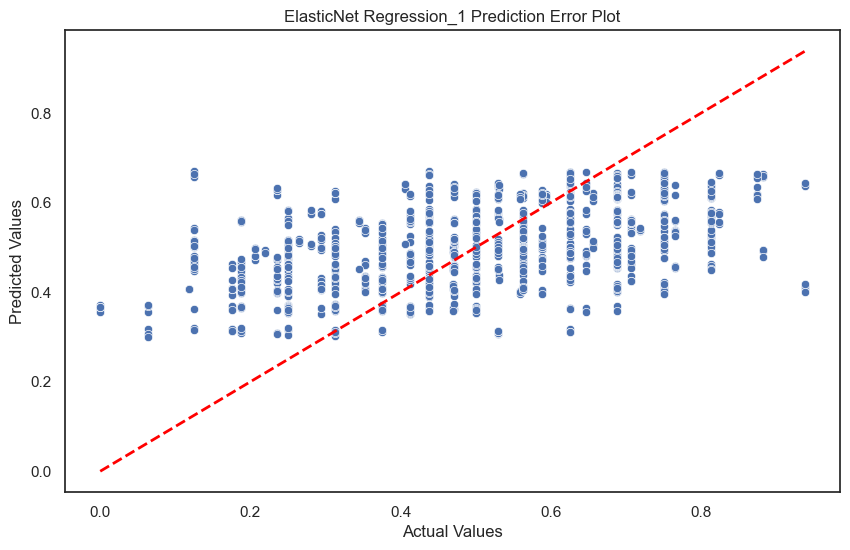

In [145]:
elasticnet_pred_error_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=y1_test,
    y=elasticnet_preds_1,
    ax=ax
    )

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--', color='red', linewidth=2)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("ElasticNet Regression_1 Prediction Error Plot")

Text(0, 0.5, 'Residuals')

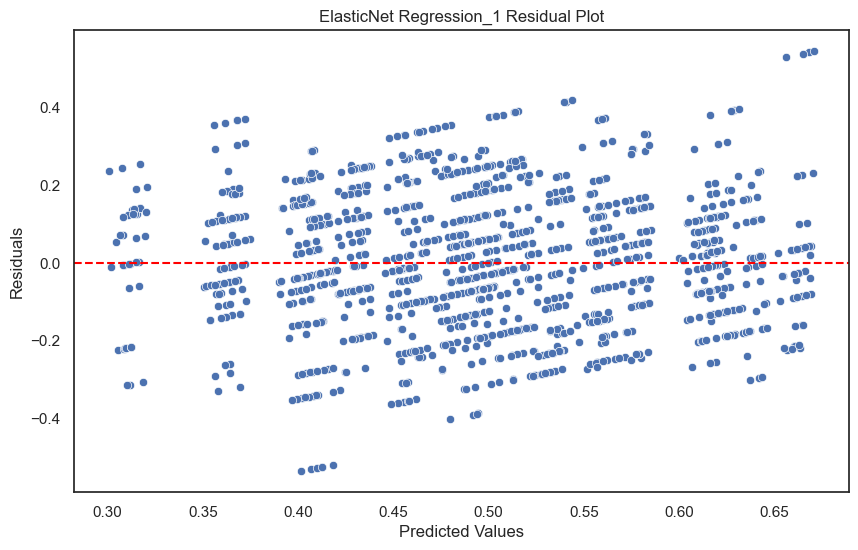

In [146]:
elasticnet_residuals_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.scatterplot(
    x=elasticnet_preds_1,
    y=elasticnet_preds_1 - y1_test,
    ax=ax
)
plt.axhline(0, color='red', linestyle='--')

ax.set_title("ElasticNet Regression_1 Residual Plot")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

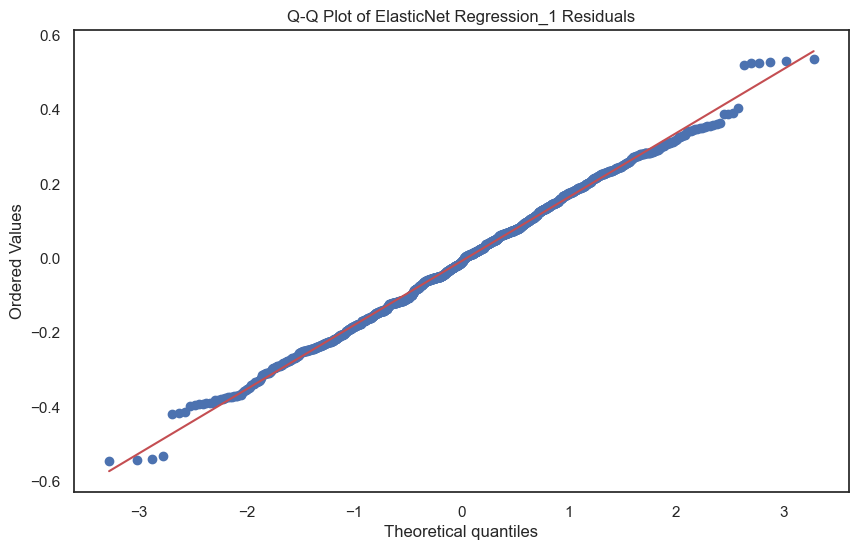

In [147]:
elasticnet_resids_1 = y1_test - elasticnet_preds_1
elasticnet_qq_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')
stats.probplot(elasticnet_resids_1, dist='norm', plot=ax)
ax.set_title('Q-Q Plot of ElasticNet Regression_1 Residuals')
# ax.set_ylim(0)
# ax.set_xlim(0)

elasticnet_qq_plot_1.savefig(f'{project_data_exports_path}/elasticnet_qq_plot_1.png', dpi=300, bbox_inches='tight')

# Model Comparisons

In [148]:
model_names_1 = ['Linear Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'LASSO Regression', 'ElasticNet Regression']

model_cv_mean_rmse_1 = [lr_rmse_scores_1.mean(), knn_rmse_scores_1.mean(),tree_rmse_scores_1.mean(), rf_rmse_scores_1.mean(),ridge_rmse_scores_1.mean(),lasso_rmse_scores_1.mean(),elasticnet_rmse_scores_1.mean(),]

model_cv_std_rmse_1 = [lr_rmse_scores_1.std(), knn_rmse_scores_1.std(),tree_rmse_scores_1.std(), rf_rmse_scores_1.std(),ridge_rmse_scores_1.std(),lasso_rmse_scores_1.std(),elasticnet_rmse_scores_1.std(),]

test_rmse_1 = [lr_rmse_1, knn_rmse_1, tree_rmse_1, rf_rmse_1, ridge_rmse_1, lasso_rmse_1, elasticnet_rmse_1]

In [149]:
model_results_df_1 = pd.DataFrame(
    {
        'model_name': model_names_1,
        'cross_val_mean_rmse': model_cv_mean_rmse_1,
        'cross_val_std_rmse': model_cv_std_rmse_1,
        'test_rmse': test_rmse_1
    })
model_results_df_1.to_csv(f'{project_data_exports_path}/model_results_df_1.csv')
model_results_df_1

,model_name,cross_val_mean_rmse,cross_val_std_rmse,test_rmse
0,Linear Regression,0.169296,0.009475,0.172333
1,KNN Regression,0.171263,0.006729,0.173368
2,Decision Tree,0.181393,0.008290,0.182622
3,Random Forest,0.181393,0.008290,0.182622
4,Ridge Regression,0.169353,0.009151,0.172217
5,LASSO Regression,0.170826,0.008827,0.173562
6,ElasticNet Regression,0.169260,0.009211,0.172176


In [150]:
model_objects_1 = {
    'Linear Regression': lr_pipe_1,
    'KNN Regression': knn_gs_1,
    'Decision Tree': tree_gs_1,
    'Random Forest': rf_gs_1,
    'Ridge Regression': ridge_gs_1,
    'LASSO Regression': lasso_gs_1,
    'ElasticNet Regression': elasticnet_gs_1,
}

In [151]:
model_predictions_1 = {}
model_rmses_1 = []

for model_name, model in model_objects_1.items():
    predictions, rmse = evaluate_model(model, X1, y1)
    model_predictions_1[model_name] = predictions
    model_rmses_1.append(rmse)

model_results_df_1['Original Dataset RMSE'] = model_rmses_1

In [152]:
model_results_df_1.to_csv(f'{project_data_exports_path}/model_results_df_1.csv')
model_results_df_1

,model_name,cross_val_mean_rmse,cross_val_std_rmse,test_rmse,Original Dataset RMSE
0,Linear Regression,0.169296,0.009475,0.172333,0.168494
1,KNN Regression,0.171263,0.006729,0.173368,0.099621
2,Decision Tree,0.181393,0.008290,0.182622,0.180895
3,Random Forest,0.181393,0.008290,0.182622,0.180895
4,Ridge Regression,0.169353,0.009151,0.172217,0.168646
5,LASSO Regression,0.170826,0.008827,0.173562,0.170648
6,ElasticNet Regression,0.169260,0.009211,0.172176,0.168530


In [153]:
# Melt the data for easier plotting
model_results_melted_df_1 = pd.melt(
    model_results_df_1,
    id_vars=["model_name"],
    value_vars=[
        "cross_val_mean_rmse",
        "test_rmse",
        "Original Dataset RMSE",
    ],
    var_name="Metric",
    value_name="RMSE",
)

# Rename metrics for better display
model_results_melted_df_1["Metric"] = model_results_melted_df_1["Metric"].replace(
    {
        "cross_val_mean_rmse": "Cross-Validation Mean RMSE",
        "test_rmse": "Test RMSE",
        "Original Dataset RMSE": "Original Dataset RMSE",
    }
)


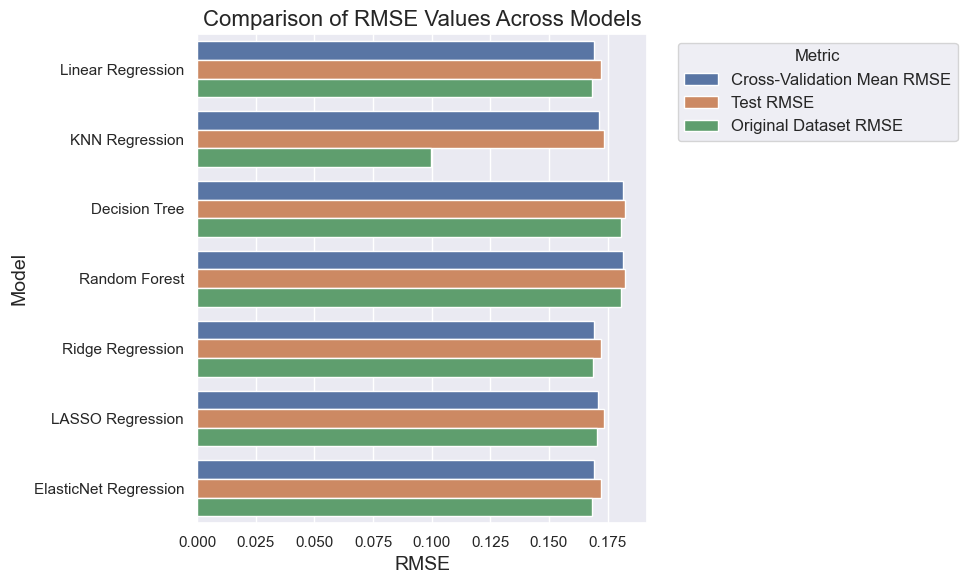

In [154]:
model_perf_rmse_plot_1, ax = plt.subplots(1, 1, figsize=(10,6), facecolor='white')

sns.barplot(
    data=model_results_melted_df_1,
    x="RMSE",
    y="model_name",
    hue="Metric",
    # errorbar=('ci', 95),
    ax=ax
)

plt.title("Comparison of RMSE Values Across Models", fontsize=16)
plt.xlabel("RMSE", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.legend(title="Metric", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
model_perf_rmse_plot_1.tight_layout()

model_perf_rmse_plot_1.savefig(f'{project_data_exports_path}/model_perf_rmse_plot_1.png', dpi=300, bbox_inches='tight')